In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [80]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
target_cols_direction = [True,]

In [21]:
target_cols_ratio = [3,]

In [22]:
# target_cols_kde = ['심전도_kde',]

In [23]:
csv_path = './output/심혈관기능_심장기능.csv'

In [24]:
model_path_man = './model/0601_man.pkl'

In [25]:
model_path_woman = './model/0601_woman.pkl'

In [26]:
# 심전도 결측치
fill_th = 1
fill_th_score = 90

In [27]:
severity_target = '심전도'
severity_target_text = '심전도_text'
severity_target_scaling = '심전도_scaling'

## 심전도 Data Load

In [28]:
# with open('../input/TEST_갑상선이상소견추출241127.json', encoding='utf-8') as f:
with open('../input/DM_기능나이_장비검사_이상소견241210.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw_text = pd.DataFrame(js)

In [29]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131105 entries, 0 to 1131104
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경                    193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도                      1030430 non-null  object
 8   위내시경 (Endo)              829744 non-null   object
dtypes: int64(3), object(6)
memory usage: 77.7+ MB


In [30]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [31]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)
0,2022,242726,974419,None,None,None,None,없음,정상
1,2022,242726,1354580,None,None,None,None,없음,정상
2,2022,242726,2513468,None,None,None,None,없음,정상
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검
4,2022,242728,993356,None,None,None,없음,없음,None


In [32]:
len(raw_text)

1131105

In [33]:
raw_text = raw_text.drop_duplicates(subset=['검진년도', 'UID', 'CU_REC_ID'], keep='first')

In [34]:
len(raw_text)

1131105

In [35]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [36]:
# raw_text.rename(columns={'갑상선초음파 (Thyroid Sono)':'갑상선초음파 (Thyroid Sono)_text',
#                          '경동맥초음파 (Carotid Sono)':'경동맥초음파 (Carotid Sono)_text',
#                          '대장내시경':'대장내시경_text', 
#                          '상복부초음파 (Abdominal Sono)':'상복부초음파 (Abdominal Sono)_text', 
#                          '심전도':'심전도_text',
#                          '위내시경 (Endo)':'위내시경 (Endo)_text'
#                         }, inplace=True)

In [37]:
raw_text.rename(columns={severity_target:severity_target_text}, inplace=True)

In [38]:
# raw_text.columns

In [39]:
raw_text['std_str'] = raw_text[severity_target_text].str.replace(' ', '')

In [40]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경                    193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도_text                 1030430 non-null  object
 8   위내시경 (Endo)              829744 non-null   object
 9   std_str                  1030430 non-null  object
dtypes: int64(3), object(7)
memory usage: 94.9+ MB


In [41]:
raw_text[raw_text['std_str'].notnull()]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도_text,위내시경 (Endo),std_str
0,2022,242726,974419,None,None,None,None,없음,정상,없음
1,2022,242726,1354580,None,None,None,None,없음,정상,없음
2,2022,242726,2513468,None,None,None,None,없음,정상,없음
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,없음
4,2022,242728,993356,None,None,None,없음,없음,None,없음
...,...,...,...,...,...,...,...,...,...,...
1131099,2024,1494531,3019796,None,None,None,None,없음,만성표재성위염,없음
1131101,2024,1494547,3019925,None,None,정상,None,없음,만성위축성위염,없음
1131102,2024,1494556,3020025,None,None,None,None,없음,"역류성식도염,만성표재성위염",없음
1131103,2024,1494574,3020119,None,None,None,없음,없음,"만성표재성위염,위용종",없음


## 라벨링 데이터 join

In [42]:
raw_text_labeling = pd.read_excel('../input/심전도.xlsx')

In [43]:
raw_text_labeling.head()

,cate,label,cnt,strip,standard,flag,error_flag,std_str,severity
0,심전도,없음,2125.0,없음,['없음$'],1.0,0.0,없음,0.0
1,심전도,동성서맥,1852.0,동성서맥,"['동성%', '서맥$']",1.0,0.0,동성서맥,1.0
2,심전도,좌심실 비대,1019.0,좌심실비대,"['좌심실%', '비대$']",1.0,0.0,좌심실비대,5.0
3,심전도,동성 서맥,685.0,동성서맥,"['동성%', '서맥$']",1.0,0.0,동성서맥,1.0
4,심전도,좌심실 비대 의심,449.0,좌심실비대의심,"['좌심실%', '비대$', '의심%']",1.0,0.0,좌심실비대의심,5.0


In [44]:
raw_text_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cate        3179 non-null   object 
 1   label       3175 non-null   object 
 2   cnt         3175 non-null   float64
 3   strip       3175 non-null   object 
 4   standard    3175 non-null   object 
 5   flag        3175 non-null   float64
 6   error_flag  3175 non-null   float64
 7   std_str     3179 non-null   object 
 8   severity    2315 non-null   float64
dtypes: float64(4), object(5)
memory usage: 223.6+ KB


In [45]:
raw_text_labeling[['std_str', 'severity']]

,std_str,severity
0,없음,0.0
1,동성서맥,1.0
2,좌심실비대,5.0
3,동성서맥,1.0
4,좌심실비대의심,5.0
...,...,...
3174,흉부전벽이상,NaN
3175,1도방실동맥장애,3.0
3176,경미한심실이완장애,6.0
3177,급성심낭염,6.0


In [46]:
raw_text_labeling[['std_str', 'severity']].value_counts().head(10)

std_str   severity
방실차단      3.0         21
T파이상      5.0         15
심실조기수축    7.0         12
좌측편위      2.0         11
저전압       3.0         11
동성서맥      1.0         11
동서맥       1.0         11
우측편위      2.0         10
심실확장      5.0         10
비특이적T파이상  3.0          9
dtype: int64

In [47]:
dic = raw_text_labeling[['std_str', 'severity']].drop_duplicates('std_str')
dic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   std_str   2201 non-null   object 
 1   severity  1458 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.6+ KB


In [48]:
raw_text = pd.merge(raw_text, dic, on='std_str', how='left')

In [49]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경                    193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도_text                 1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  1030430 non-null  object 
 10  severity                 991398 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 103.6+ MB


In [50]:
raw_text[raw_text[severity_target_text].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도_text,위내시경 (Endo),std_str,severity
0,2022,242726,974419,None,None,None,None,없음,정상,없음,0.0
1,2022,242726,1354580,None,None,None,None,없음,정상,없음,0.0
2,2022,242726,2513468,None,None,None,None,없음,정상,없음,0.0
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,없음,0.0
4,2022,242728,993356,None,None,None,없음,없음,None,없음,0.0
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",없음,0.0
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,없음,0.0
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,없음,0.0
8,2022,242735,1290410,정상,None,None,정상,없음,만성표재성위염,없음,0.0
9,2022,242738,908504,갑상선결절,None,None,None,없음,위염,없음,0.0


In [51]:
def max_value(values):
    max_val = 0
    
    if values == None:
        return
    elif values.find(',') > 0:        
        s = values.split(',')
        df_temp = pd.DataFrame(s, columns=['std_str'])        
        df_temp = pd.merge(df_temp, dic, on='std_str', how='left')
#         print(df_temp.head())
#         print('max :' df_temp['severity'].max())
        return df_temp['severity'].max()

In [52]:
raw_text['severity2'] = raw_text[severity_target_text].apply(max_value)

In [53]:
raw_text[raw_text[severity_target_text].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도_text,위내시경 (Endo),std_str,severity,severity2
0,2022,242726,974419,None,None,None,None,없음,정상,없음,0.0,NaN
1,2022,242726,1354580,None,None,None,None,없음,정상,없음,0.0,NaN
2,2022,242726,2513468,None,None,None,None,없음,정상,없음,0.0,NaN
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,없음,0.0,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,없음,0.0,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",없음,0.0,NaN
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,없음,0.0,NaN
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,없음,0.0,NaN
8,2022,242735,1290410,정상,None,None,정상,없음,만성표재성위염,없음,0.0,NaN
9,2022,242738,908504,갑상선결절,None,None,None,없음,위염,없음,0.0,NaN


In [54]:
raw_text['severity'].value_counts()

0.0     900177
1.0      47115
5.0      11680
3.0      11618
7.0      10107
6.0       5956
9.0       2385
8.0        870
10.0       750
2.0        396
4.0        344
Name: severity, dtype: int64

In [55]:
raw_text['severity2'].value_counts()

5.0     3518
3.0     2372
7.0     1824
6.0     1212
9.0     1038
8.0      371
1.0      243
2.0      119
10.0     100
0.0       43
4.0       32
Name: severity2, dtype: int64

In [56]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경                    193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도_text                 1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  1030430 non-null  object 
 10  severity                 991398 non-null   float64
 11  severity2                10872 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ MB


In [57]:
raw_text[(raw_text['severity'] >= 0) & (raw_text['severity2'] >= 0)]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도_text,위내시경 (Endo),std_str,severity,severity2


In [58]:
raw_text['severity'] = raw_text['severity'].astype(np.float64)
raw_text['severity2'] = raw_text['severity2'].astype(np.float64)

In [59]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경                    193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도_text                 1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  1030430 non-null  object 
 10  severity                 991398 non-null   float64
 11  severity2                10872 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ MB


In [60]:
arr = []
for idx, value in enumerate(raw_text['severity']):
    if value >= 0:
        arr.append(value)
    elif raw_text.loc[idx, 'severity2'] >= 0:
        arr.append(raw_text.loc[idx, 'severity2'])
    else:
        arr.append(np.nan)

In [61]:
len(arr)

1131105

In [62]:
raw_text[severity_target] = arr

In [63]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도_text,위내시경 (Endo),std_str,severity,severity2,심전도
0,2022,242726,974419,None,None,None,None,없음,정상,없음,0.0,NaN,0.0
1,2022,242726,1354580,None,None,None,None,없음,정상,없음,0.0,NaN,0.0
2,2022,242726,2513468,None,None,None,None,없음,정상,없음,0.0,NaN,0.0
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,없음,0.0,NaN,0.0
4,2022,242728,993356,None,None,None,없음,없음,None,없음,0.0,NaN,0.0
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",없음,0.0,NaN,0.0
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,없음,0.0,NaN,0.0
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,없음,0.0,NaN,0.0
8,2022,242735,1290410,정상,None,None,정상,없음,만성표재성위염,없음,0.0,NaN,0.0
9,2022,242738,908504,갑상선결절,None,None,None,없음,위염,없음,0.0,NaN,0.0


## Join

In [64]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1227553 non-null  object
 1   UID        1227553 non-null  int64 
 2   CU_REC_ID  1227553 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 28.1+ MB


In [65]:
raw['검진년도'] = raw['검진년도'].astype(int)

In [66]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   검진년도       1227553 non-null  int32
 1   UID        1227553 non-null  int64
 2   CU_REC_ID  1227553 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 23.4 MB


In [67]:
len(raw)

1227553

In [93]:
raw.rename(columns={"심전도":"심전도_org"}, inplace=True)

In [81]:
raw.drop([severity_target], axis=1, inplace=True)

In [83]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1131105 non-null  int64  
 1   UID                      1131105 non-null  int64  
 2   CU_REC_ID                1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object 
 5   대장내시경                    193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object 
 7   심전도_text                 1030430 non-null  object 
 8   위내시경 (Endo)              829744 non-null   object 
 9   std_str                  1030430 non-null  object 
 10  severity                 991398 non-null   float64
 11  severity2                10872 non-null    float64
 12  심전도                      1002270 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory 

In [84]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도_text,위내시경 (Endo),std_str,severity,severity2,심전도
0,2022,242726,974419,None,None,None,None,없음,정상,없음,0.0,NaN,0.0
1,2022,242726,1354580,None,None,None,None,없음,정상,없음,0.0,NaN,0.0
2,2022,242726,2513468,None,None,None,None,없음,정상,없음,0.0,NaN,0.0
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,없음,0.0,NaN,0.0
4,2022,242728,993356,None,None,None,없음,없음,None,없음,0.0,NaN,0.0


In [90]:
raw.head()

,검진년도,UID,CU_REC_ID,SEX,BRDT,검진당시나이,CU_INF_CONT,ETL_REG_DTM,백혈구(WBC),공복시혈당(FBS),중성지방(TG),HDL-콜레스테롤,수축기 혈압,이완기 혈압,LDL-콜레스테롤,호산구 (Eosinophil),체중,크레아티닌(Creatinine),AST(SGOT),r-GTP(GGT),ALT(SGPT),혈색소(Hb),총콜레스테롤,적혈구(RBC),혈소판 (Platelet),평균적혈구혈색소농도(MCHC),요소질소 (BUN),평균적혈구혈색소(MCH),신장,평균적혈구용적(MCV),알부민,총단백 (T-Protein),적혈구용적 (Hematocrit),총빌리루빈,B형간염항체 (HBs Ab),림프구 (Lymphocyte),허리둘레,요단백,단핵구 (Monocyte),유로빌리노겐,요당 (Gluco),요산 (PH),요비중 (SG),케톤,요산(Uric acid),아질산염 (Nitrite),ALP,직접빌리루빈,빌리루빈,체질량지수(BMI),...,A/G비율,위내시경 (Endo),글로블린,상복부초음파 (Abdominal Sono),B/C 비율,요백혈구(Leukocytes),간접빌리루빈,맥박,갑상선초음파 (Thyroid Sono),CPK(CK),대장내시경,불포화결합능(UIBC),총철결합능(TIBC),분획호중구 (Seg Neutroph),노력성폐활량 (FVC),1초간노력성호기량 (FEV1),흉부X-선 (Chest PA),골밀도검사(BMD),경동맥초음파 (Carotid Sono),요추 CT,뇌 CT,동맥경화검사,경추 CT,Na(나트륨),류마티스수치 (RA Rate),심장초음파 (Echocardio Sono),뇌MRI,뇌MRA,CRF (심장위험인자),골밀도검사(허리),골밀도검사 (T-Score),골격근량,인슐린저항성 (HOMA-IR),Lipoprotein A,위암혈액검사(Pepsinogen I),위암혈액검사(Pepsinogen II),위암혈액검사(Pepsinogen ratio),Gastrin(가스트린),Helicobactor pylori IgG(혈액),Helicobactor Pylori IgM(혈액),Cortisol(스트레스호르몬),성장관련인자(IGF1),Testosterone(테스토스테론),에스트라디올(Estradiol),FSH(난포자극호르몬),NK세포활성도검사,P(인),류마티스인자 (RA Factor),심장칼슘CT,심장주위지방CT
0,2010,7282,2520,1,1968-10-13,42,종합검진,2024-10-14 12:19:11.073,6.56,83,98,73,110,66,139,1.1,72.9,1.13,20,22,21,16,224,4.94,195,34.6,12,32.4,187,93.5,4.4,7.6,46.2,1.7,Pos(15.02),46.5,None,Trace,9.9,Negative,Negative,5,1.025,None,6.9,Negative,63,0.3,1+,None,...,None,위축성 위염,None,간내 혈관종 의심,None,None,None,76,None,None,None,None,None,42,None,None,"비활동성 폐결핵,양측",None,None,None,None,None,None,141,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,4.1,None,None,None
1,2010,7490,3638,1,1971-10-20,39,종합검진,2024-10-14 12:19:11.073,6.5,125,103,57,120,80,187.4,3,87,1.1,25,65,40,15.8,265,5.31,214,33.1,14,29.8,None,89.8,4.5,6.9,47.7,0.9,음성,41,None,음성,8,음성,음성,7.5,1.015,음성,5.3,음성,164,0.3,음성,None,...,1.9,"역류성 식도염, 홍반성 위염",2.4,None,12.7,음성,0.6,None,정상,138,None,160,50.2,48,4.4,4.01,정상,정상,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,음성,None,None
2,2010,7915,3997,1,1974-08-27,36,종합검진,2024-10-14 12:19:11.073,5.14,104,547,37,120,70,50,2.1,85.9,1.1,19,66,17,18.3,196,5.98,212,35.6,14,30.6,178,86,4.3,7.3,51.4,1.4,7.3(-),22.8,None,NEGATIVE,6.2,0.2 E.U./dL,NEGATIVE,5.5,>=1.030,NEGATIVE,5.4,NEGATIVE,184,None,1+,None,...,1.4,None,3,None,13,None,None,68,None,None,None,None,None,68.3,4.75,3.75,정상,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3.5,Negative,None,None
3,2010,8056,4745,1,1968-01-17,42,종합검진,2024-10-14 12:19:11.073,7.0,89,378,53,None,None,181.4,3,64,0.8,33,157,39,15.5,310,5.25,242,31.3,8,29.5,166,29.5,4.7,7.2,49.5,0.7,음성,39,80,음성,8,음성,음성,6.5,1.010,음성,7.5,음성,165,0.2,음성,None,...,None,"경증 출혈성 위염(전정부), 경증 십이지장염(구부)",2.5,None,10.0,음성,None,None,정상,85,None,111,None,50,None,None,정상,None,None,None,None,정상,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,음성,None,None
4,2010,8457,3929,1,1972-02-13,38,종합검진,2024-10-14 12:19:11.073,7.01,121,154,50,130,80,108,2.4,101.7,1.2,28,27,18,16.9,189,5.28,179,35.1,12,32,180,91.1,4.5,7.6,48.1,1.9,12.7(+),46.2,None,NEGATIVE,6,0.2 E.U./dL,NEGATIVE,5.5,1.025,NEGATIVE,6.1,NEGATIVE,147,None,NEGATIVE,None,...,1.5,None,3.1,None,10,None,None,73,None,None,None,None,None,45.3,5.94,5.19,정상,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.6,Negative,None,None


In [103]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1227553 non-null  object
 1   UID        1227553 non-null  int64 
 2   CU_REC_ID  1227553 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 28.1+ MB


In [104]:
raw['검진년도'] = raw['검진년도'].astype('int64')

In [105]:
raw_merge = pd.merge(raw, raw_text[['검진년도', 'UID', 'CU_REC_ID', severity_target, severity_target_text]], 
               on=['검진년도', 'UID', 'CU_REC_ID'], how='left')

In [106]:
len(raw_merge)

1227553

## 연령대 제한

In [107]:
len(raw_merge)

1227553

In [108]:
raw_merge = raw_merge[(raw_merge['검진당시나이'] >= 20) & (raw_merge['검진당시나이'] < 70)]
raw_merge.reset_index(drop=True, inplace=True)

In [109]:
len(raw_merge)

1213899

In [110]:
raw_merge.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Testosterone(테스토스테론)', '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)',
       'NK세포활성도검사', 'P(인)', '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT', '심전도',
       '심전도_text'],
      dtype='object', length=137)

In [111]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [115]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        severity_target_text, 
        severity_target,
               ]

df = raw_merge[cols]

In [116]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도
0,2010,7282,2520,1,42,좌심실비대,5.0
1,2010,7490,3638,1,39,없음,0.0
2,2010,7915,3997,1,36,없음,0.0
3,2010,8056,4745,1,42,없음,0.0
4,2010,8457,3929,1,38,없음,0.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   심전도_text   958427 non-null   object 
 6   심전도        932447 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 64.8+ MB


In [118]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '심전도_text', '심전도'], dtype='object')

<AxesSubplot:xlabel='index'>

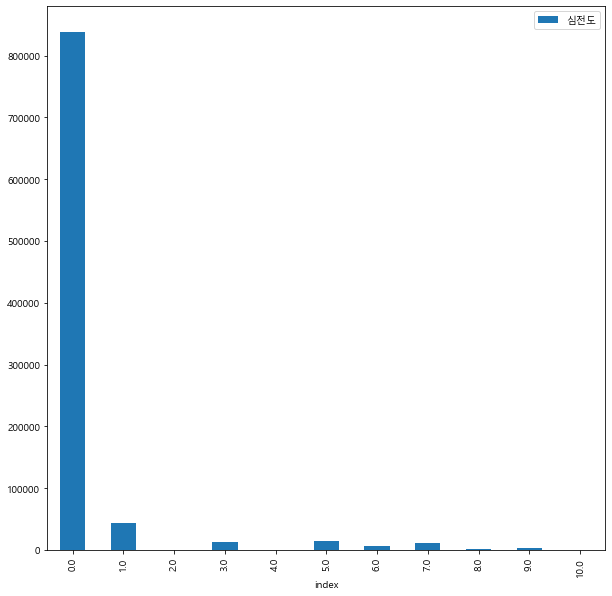

In [119]:
plt.rcParams["figure.figsize"] = (10, 10)
df[severity_target].value_counts().reset_index().sort_values('index').plot.bar(x='index', y=severity_target)

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [120]:
df.isnull().sum()

검진년도              0
UID               0
CU_REC_ID         0
SEX               0
검진당시나이            0
심전도_text     255472
심전도          281452
dtype: int64

In [121]:
df_group = df.groupby(['UID', '검진년도'])

In [122]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [123]:
temp

['심전도_text', '심전도']

In [124]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 심전도_text
column : 심전도
1237.50811 sec


In [125]:
df.isnull().sum()

검진년도              0
UID               0
CU_REC_ID         0
SEX               0
검진당시나이            0
심전도_text     199536
심전도          226784
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [126]:
numeric_col = df.drop(columns=[severity_target_text]).columns

In [127]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   심전도_text   1014363 non-null  object 
 6   심전도        987115 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 64.8+ MB


In [129]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,987115.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,0.340809
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.306820
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,0.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,0.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,0.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,10.000000


In [130]:
df[severity_target].value_counts()

0.0     886501
1.0      47178
5.0      14954
3.0      13630
7.0      11822
6.0       6905
9.0       3282
8.0       1168
10.0       804
2.0        505
4.0        366
Name: 심전도, dtype: int64

In [182]:
df_result = df.drop(columns=[severity_target_text]).copy()

# 이상치 제거

In [183]:
len(df_result)

1213899

In [184]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [226]:
temp = df_result.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [186]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]

# target_cols = temp

# minimums = []
# maximums = []

# for col in target_cols:
#     target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
#     print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
#     print()
#     minimums.append(temp_min)
#     maximums.append(temp_max)

# for idx, col in enumerate(target_cols):    
#     target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
#     df_result = df_result.drop(target_outlier.index)
#     df_result.reset_index(drop=True, inplace=True)

In [227]:
target_cols = temp

In [187]:
# target_cols

[]

In [188]:
# minimums

[]

In [189]:
# maximums

[]

In [190]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   심전도        987115 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 55.6 MB


In [191]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도
0,2010,7282,2520,1,42,5.0
1,2010,7490,3638,1,39,0.0
2,2010,7915,3997,1,36,0.0
3,2010,8056,4745,1,42,0.0
4,2010,8457,3929,1,38,0.0


In [192]:
len(df_result)

1213899

In [193]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   심전도        987115 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 55.6 MB


In [194]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,987115.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,0.340809
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.306820
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,0.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,0.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,0.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,10.000000


# 스크리닝

## 스크리닝

In [195]:
# screening = 80

In [196]:
# scr_col = 'ALP'

In [197]:
# df_result[df_result[scr_col] < screening].head()

In [198]:
# len(df_result[df_result[scr_col] < screening])

In [199]:
# df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [200]:
# df_result[df_result[scr_col] < screening].head()

In [201]:
# len(df_result[df_result[scr_col] < screening])

# target (건강지수) 계산

In [202]:
len(df_result)

1213899

## Linear Regression coefficient 계산

In [203]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [204]:
# target_cols

In [205]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [206]:
# df_man[df_man['target'].isna()]

In [207]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [208]:
# df_target = pd.concat([df_man, df_woman])

In [209]:
# len(df_target)

In [210]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [211]:
# len(df_target)

In [212]:
# df_target[df_target['target'].isna()]

In [213]:
# df_target.info()

In [214]:
# df_target.head()

In [215]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [216]:
# len(df_target)

In [217]:
# df_target.describe()

In [218]:
# df_target[df_target['target'] == 50]

In [219]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [220]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [221]:
# len(df_target)

In [222]:
# df_target.head()

In [223]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

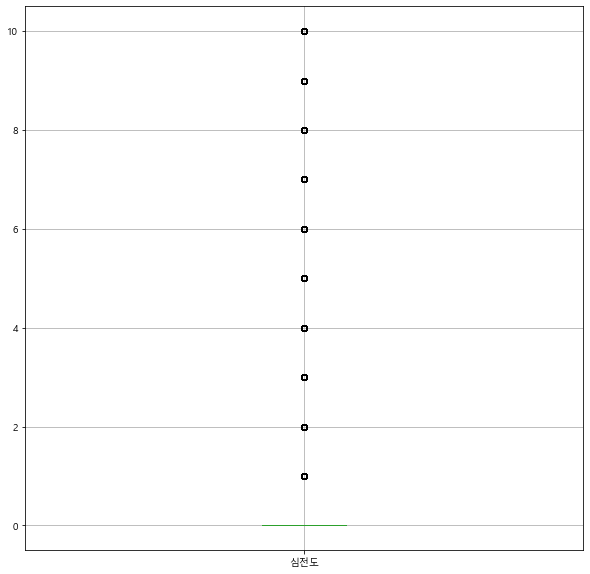

In [228]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [229]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도
0,2010,7282,2520,1,42,5.0
1,2010,7490,3638,1,39,0.0
2,2010,7915,3997,1,36,0.0
3,2010,8056,4745,1,42,0.0
4,2010,8457,3929,1,38,0.0


In [230]:
target_cols

['심전도']

In [231]:
len(target_cols)

1

In [232]:
target_cols_direction

[True]

In [178]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
#     df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [179]:
target_cols

['심전도']

## 심각도는 kde 제외

In [233]:
# import time
# start = time.time()
# df_target = kde_col(df_result, target_cols)
# # df_target = kde_col(df_result, target_cols)
# end = time.time()
# print(f"{end - start:.5f} sec")

## 이상소견 심각도 scaling

In [234]:
target_cols[0]

'심전도'

In [236]:
df_target = df_result.copy()

In [237]:
# 심각도 Min
# score_min = 0
# score_max = 10
# df_target[target_cols[3]+'_scaling'] = ((((df_target[target_cols[3]] - 0) / (10 - 0)) * -1) + 1) * 200

df_target[severity_target_scaling] = (100 - (df_target[severity_target] * 10))

In [238]:
# df_target[target_cols[3]+'_scaling'] = df_target[target_cols[3]+'_scaling'].replace(100, 200)

In [239]:
df_target[severity_target].value_counts()

0.0     886501
1.0      47178
5.0      14954
3.0      13630
7.0      11822
6.0       6905
9.0       3282
8.0       1168
10.0       804
2.0        505
4.0        366
Name: 심전도, dtype: int64

In [240]:
df_target[severity_target_scaling].value_counts()

100.0    886501
90.0      47178
50.0      14954
70.0      13630
30.0      11822
40.0       6905
10.0       3282
20.0       1168
0.0         804
80.0        505
60.0        366
Name: 심전도_scaling, dtype: int64

In [241]:
df_target[severity_target].isnull().sum()

226784

In [242]:
df_target[severity_target_scaling].isnull().sum()

226784

## 심전도 결측치 

In [243]:
target_cols[0]

'심전도'

In [244]:
df_target[severity_target].fillna(fill_th, inplace=True)
df_target[severity_target_scaling].fillna(fill_th_score, inplace=True)

In [245]:
df_target['kde_mean'] = df_target.iloc[:, (5+len(target_cols)):(5+len(target_cols)+len(target_cols))].mean('columns').round(2)

In [246]:
df_target['kde_mean'].min()

0.0

In [247]:
df_target['kde_mean'].max()

100.0

In [248]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean
14057,2018,11130,1329257,1,20,1.0,90.0,90.0
15320,2018,152049,1036449,1,20,1.0,90.0,90.0
21918,2019,8624,409615,1,20,0.0,100.0,100.0
23756,2019,14030,357142,1,20,0.0,100.0,100.0
23865,2019,14381,376153,1,20,0.0,100.0,100.0
26161,2019,34348,334912,1,20,0.0,100.0,100.0
26905,2019,36534,1992864,1,20,1.0,90.0,90.0
26917,2019,36534,349078,1,20,1.0,90.0,90.0
28211,2019,41096,329045,1,20,0.0,100.0,100.0
32819,2019,117629,330495,1,20,0.0,100.0,100.0


In [249]:
df_target['검진당시나이'].value_counts()

40    54076
38    52307
36    49894
42    49032
39    45345
41    45112
37    44517
34    44179
32    43530
30    42591
44    41999
35    41754
43    39586
46    38529
48    38121
50    37683
33    36204
31    36155
45    34448
49    33916
47    33630
28    33499
51    33284
52    32716
29    31078
53    26871
54    24383
27    22908
26    19481
55    17413
56    15426
57    12776
58    11404
25    10466
59     8930
24     6981
60     6505
23     3307
22     2541
62     1845
61     1838
63     1294
21     1276
64     1242
20     1111
65      847
66      725
67      460
68      441
69      243
Name: 검진당시나이, dtype: int64

In [250]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,4.639612e-01,9.536039e+01,9.536039e+01
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.206126e+00,1.206126e+01,1.206126e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,0.000000e+00,9.000000e+01,9.000000e+01
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,0.000000e+00,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.000000e+00,1.000000e+02,1.000000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.000000e+01,1.000000e+02,1.000000e+02


## 검진 항목 별 가중치 

In [251]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean
0,2010,7282,2520,1,42,5.0,50.0,50.0
1,2010,7490,3638,1,39,0.0,100.0,100.0
2,2010,7915,3997,1,36,0.0,100.0,100.0
3,2010,8056,4745,1,42,0.0,100.0,100.0
4,2010,8457,3929,1,38,0.0,100.0,100.0


In [252]:
# target_cols_kde

['심전도_kde']

In [253]:
target_cols_ratio

[3]

In [254]:
sum(target_cols_ratio)

3

In [255]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   검진년도         1213899 non-null  int64  
 1   UID          1213899 non-null  int64  
 2   CU_REC_ID    1213899 non-null  int64  
 3   SEX          1213899 non-null  int64  
 4   검진당시나이       1213899 non-null  int64  
 5   심전도          1213899 non-null  float64
 6   심전도_scaling  1213899 non-null  float64
 7   kde_mean     1213899 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 74.1 MB


In [257]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target['심전도_scaling'])    
) / sum(target_cols_ratio)

In [258]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

<AxesSubplot:>

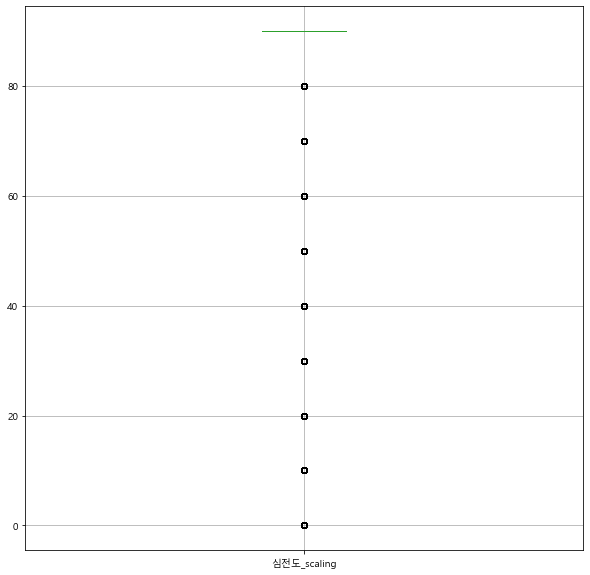

In [259]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=[severity_target_scaling])

<AxesSubplot:>

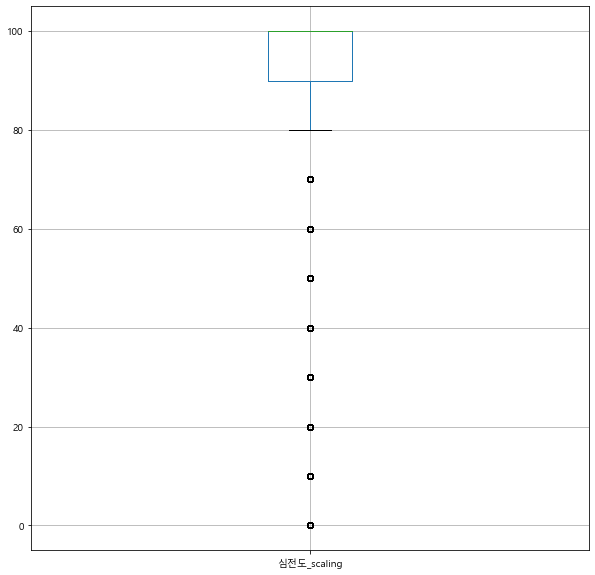

In [260]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=[severity_target_scaling])

## target Scaling

In [261]:
df_target['kde_mean'].min()

0.0

In [262]:
df_target['kde_mean'].max()

100.0

In [263]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [264]:
df_target['target'] = (df_target['target'] * 100) + 50

In [265]:
df_target['target'] = df_target['target'].round(0)

In [266]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
8,50.0,804
6,55.0,3282
7,60.0,1168
4,65.0,11822
5,70.0,6905
2,75.0,14954
10,80.0,366
3,85.0,13630
9,90.0,505
1,95.0,273962


In [267]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,4.639612e-01,9.536039e+01,9.536039e+01,9.768019e+01
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.206126e+00,1.206126e+01,1.206126e+01,6.030630e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,0.000000e+00,9.000000e+01,9.000000e+01,9.500000e+01
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02


<AxesSubplot:>

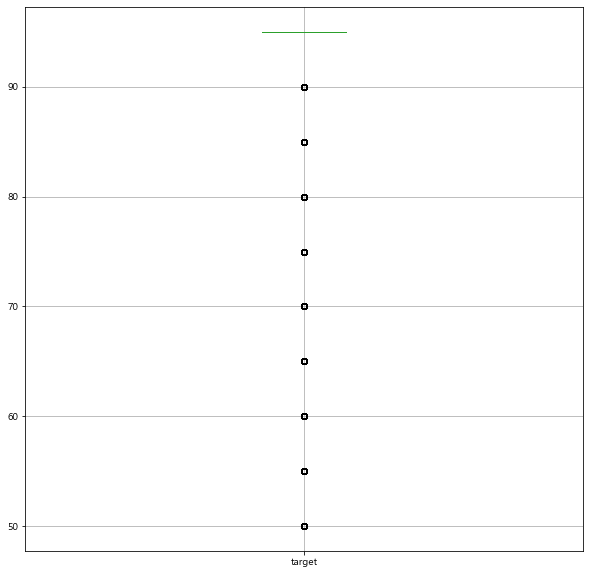

In [268]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

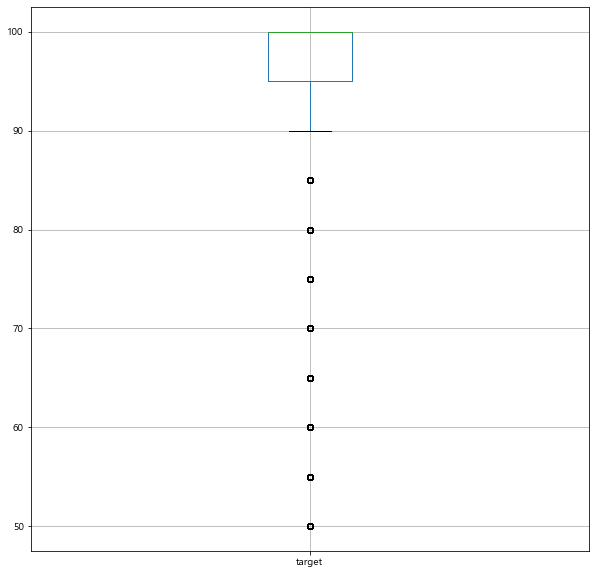

In [269]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

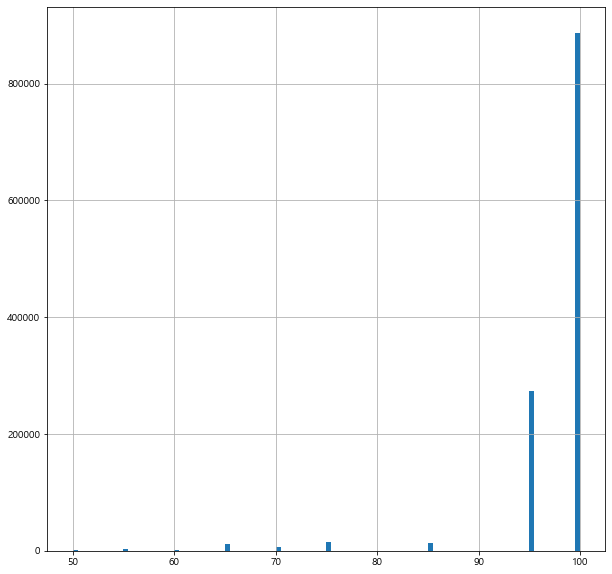

In [270]:
df_boxplot['target'].hist(bins=100)

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

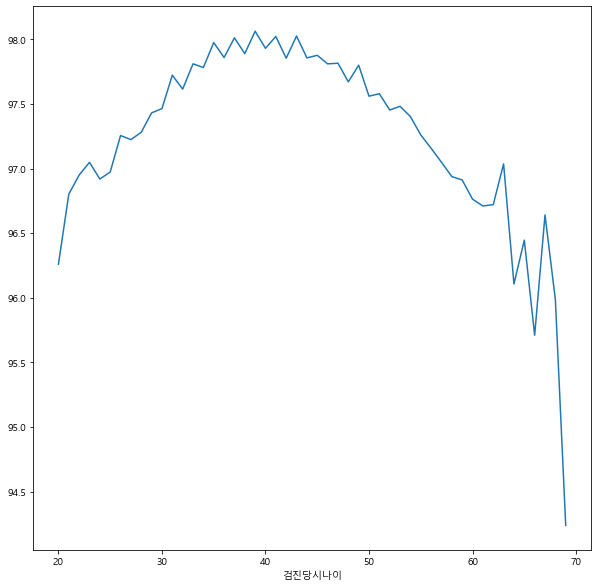

In [271]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

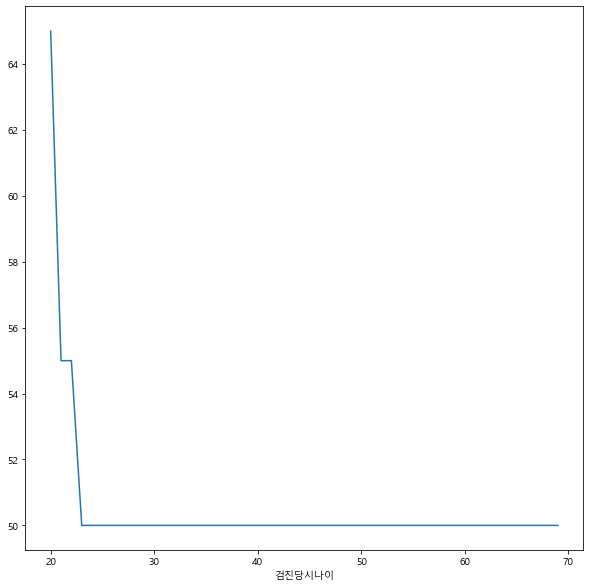

In [272]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

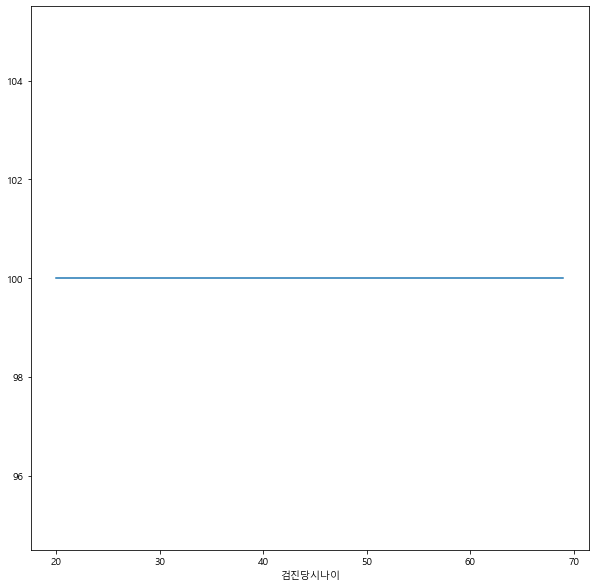

In [273]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [274]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2010,7282,2520,1,42,5.0,50.0,50.0,75.0
1,2010,7490,3638,1,39,0.0,100.0,100.0,100.0
2,2010,7915,3997,1,36,0.0,100.0,100.0,100.0
3,2010,8056,4745,1,42,0.0,100.0,100.0,100.0
4,2010,8457,3929,1,38,0.0,100.0,100.0,100.0


# 결측행 제거

In [275]:
# df_result.dropna(axis=0).info()

In [276]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [277]:
df_target['SEX'].value_counts()

1    765459
2    448440
Name: SEX, dtype: int64

In [278]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

765459

In [279]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2010,7282,2520,1,42,5.0,50.0,50.0,75.0
1,2010,7490,3638,1,39,0.0,100.0,100.0,100.0
2,2010,7915,3997,1,36,0.0,100.0,100.0,100.0
3,2010,8056,4745,1,42,0.0,100.0,100.0,100.0
4,2010,8457,3929,1,38,0.0,100.0,100.0,100.0


# 결측치 처리

## 결측치 삭제

In [280]:
# df_man.dropna(inplace=True)

In [281]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2010,7282,2520,1,42,5.0,50.0,50.0,75.0
1,2010,7490,3638,1,39,0.0,100.0,100.0,100.0
2,2010,7915,3997,1,36,0.0,100.0,100.0,100.0
3,2010,8056,4745,1,42,0.0,100.0,100.0,100.0
4,2010,8457,3929,1,38,0.0,100.0,100.0,100.0


## 결측치 평균으로 대체

In [282]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [283]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [284]:
target_cols

['심전도']

In [285]:
len(df_man)

765459

In [286]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [287]:
len(df_man)

765459

In [288]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2010,7282,2520,1,42,5.0,50.0,50.0,75.0
1,2010,7490,3638,1,39,0.0,100.0,100.0,100.0
2,2010,7915,3997,1,36,0.0,100.0,100.0,100.0
3,2010,8056,4745,1,42,0.0,100.0,100.0,100.0
4,2010,8457,3929,1,38,0.0,100.0,100.0,100.0


## fillna

In [289]:
df_man.mean().round(2)

검진년도              2021.91
UID             514677.07
CU_REC_ID      1496169.59
SEX                  1.00
검진당시나이              42.03
심전도                  0.50
심전도_scaling         95.03
kde_mean            95.03
target              97.52
dtype: float64

In [290]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [291]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [292]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [293]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [294]:
len(df_man)

765459

In [295]:
len(df_man)

765459

In [296]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [297]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
966,2011,32,11757,1,24,1.0,90.0,90.0,95.0
21323,2019,50,356493,1,53,0.0,100.0,100.0,100.0
261100,2021,50,642497,1,55,0.0,100.0,100.0,100.0
21325,2019,62,421626,1,40,0.0,100.0,100.0,100.0
139208,2020,62,565527,1,41,0.0,100.0,100.0,100.0
261105,2021,62,699357,1,42,0.0,100.0,100.0,100.0
419138,2022,62,1356310,1,43,0.0,100.0,100.0,100.0
691584,2023,62,2170394,1,44,0.0,100.0,100.0,100.0
21326,2019,67,410099,1,51,1.0,90.0,90.0,95.0
139209,2020,67,481109,1,52,1.0,90.0,90.0,95.0


In [298]:
len(df_man)

765459

In [299]:
df_man[target_cols]

,심전도
966,1.0
21323,0.0
261100,0.0
21325,0.0
139208,0.0
...,...
814882,0.0
814859,0.0
814886,0.0
814887,0.0


## first만 남겨두고 중복 제거

In [300]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [301]:
len(df_man)

647799

In [302]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
966,2011,32,11757,1,24,1.0,90.0,90.0,95.0
21323,2019,50,356493,1,53,0.0,100.0,100.0,100.0
261100,2021,50,642497,1,55,0.0,100.0,100.0,100.0
21325,2019,62,421626,1,40,0.0,100.0,100.0,100.0
139208,2020,62,565527,1,41,0.0,100.0,100.0,100.0
261105,2021,62,699357,1,42,0.0,100.0,100.0,100.0
419138,2022,62,1356310,1,43,0.0,100.0,100.0,100.0
691584,2023,62,2170394,1,44,0.0,100.0,100.0,100.0
21326,2019,67,410099,1,51,1.0,90.0,90.0,95.0
139209,2020,67,481109,1,52,1.0,90.0,90.0,95.0


In [303]:
df_man.reset_index(drop=True, inplace=True)

In [304]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2011,32,11757,1,24,1.0,90.0,90.0,95.0
1,2019,50,356493,1,53,0.0,100.0,100.0,100.0
2,2021,50,642497,1,55,0.0,100.0,100.0,100.0
3,2019,62,421626,1,40,0.0,100.0,100.0,100.0
4,2020,62,565527,1,41,0.0,100.0,100.0,100.0


In [305]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647799 entries, 0 to 647798
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   검진년도         647799 non-null  int64  
 1   UID          647799 non-null  int64  
 2   CU_REC_ID    647799 non-null  int64  
 3   SEX          647799 non-null  int64  
 4   검진당시나이       647799 non-null  int64  
 5   심전도          647799 non-null  float64
 6   심전도_scaling  647799 non-null  float64
 7   kde_mean     647799 non-null  float64
 8   target       647799 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 44.5 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

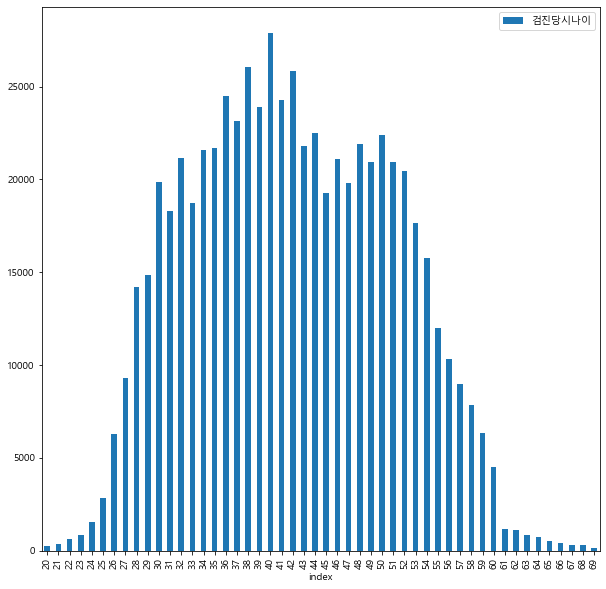

In [306]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [307]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,246
45,21,338
42,22,615
39,23,825
36,24,1539
35,25,2818
33,26,6301
29,27,9279
26,28,14224
25,29,14826


# 검진항목 시각화

In [308]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
count,647799.000000,6.477990e+05,6.477990e+05,647799.0,647799.000000,647799.000000,647799.000000,647799.000000,647799.000000
mean,2021.851082,5.103385e+05,1.491469e+06,1.0,41.996622,0.509340,94.906599,94.906599,97.453300
std,1.759744,3.646793e+05,8.090123e+05,0.0,8.867960,1.259246,12.592458,12.592458,6.296229
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,0.000000,0.000000,0.000000,50.000000
25%,2021.000000,2.224965e+05,6.594805e+05,1.0,35.000000,0.000000,90.000000,90.000000,95.000000
50%,2022.000000,3.816920e+05,1.409644e+06,1.0,42.000000,0.000000,100.000000,100.000000,100.000000
75%,2023.000000,8.388380e+05,2.190277e+06,1.0,49.000000,1.000000,100.000000,100.000000,100.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,10.000000,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='검진당시나이'>

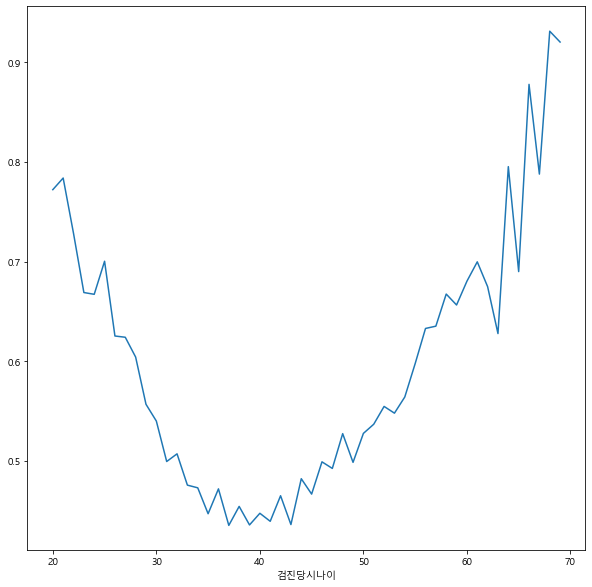

In [309]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

In [311]:
# df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [312]:
# df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

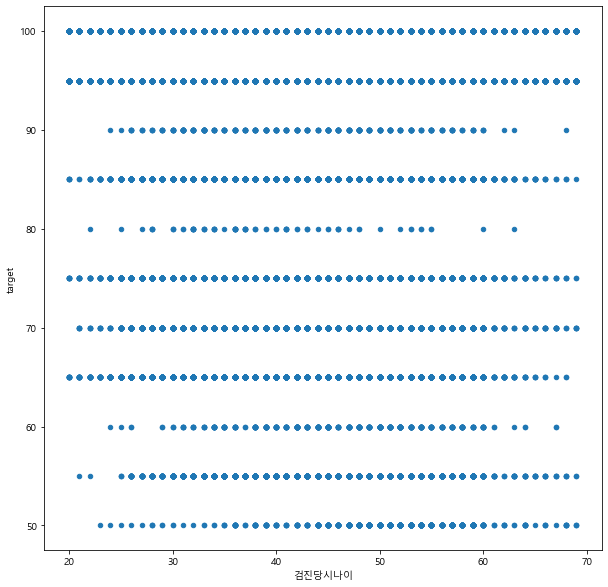

In [313]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

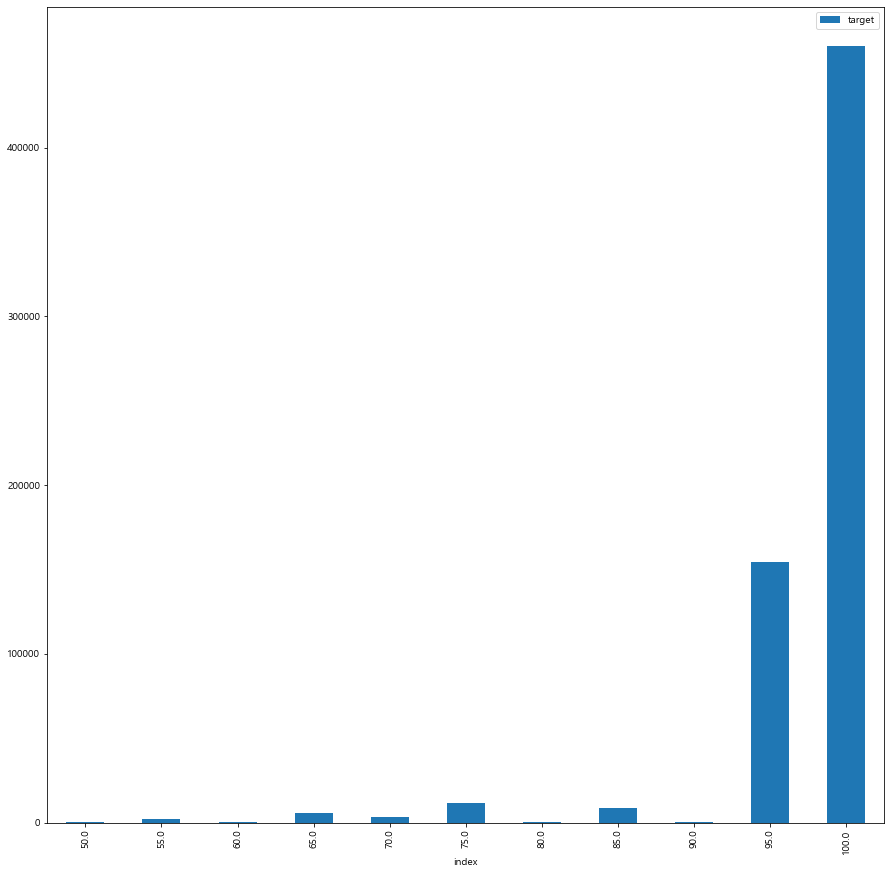

In [314]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [315]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
7,50.0,612
6,55.0,2065
8,60.0,402
4,65.0,5889
5,70.0,3513
2,75.0,11585
10,80.0,80
3,85.0,8837
9,90.0,319
1,95.0,154334


In [316]:
# df_man_sampling = pd.DataFrame()

# # for target in range(int(df_man['target'].min()), 100):
# for target in range(50, 100):
    
# #     print(target, 200 - target)
#     left_len = len(df_man[df_man['target'] == target])
#     right_len = len(df_man[df_man['target'] == (200 - target)])
    
# #     print(target, left_len, right_len)
    
#     if left_len >= right_len:
#         if left_len > 0:
#             df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
#         if right_len > 0:
#             df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
#     else:
#         if left_len > 0:
#             df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
#         if right_len > 0:
#             df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

# df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [317]:
df_man_sampling = df_man

<AxesSubplot:xlabel='index'>

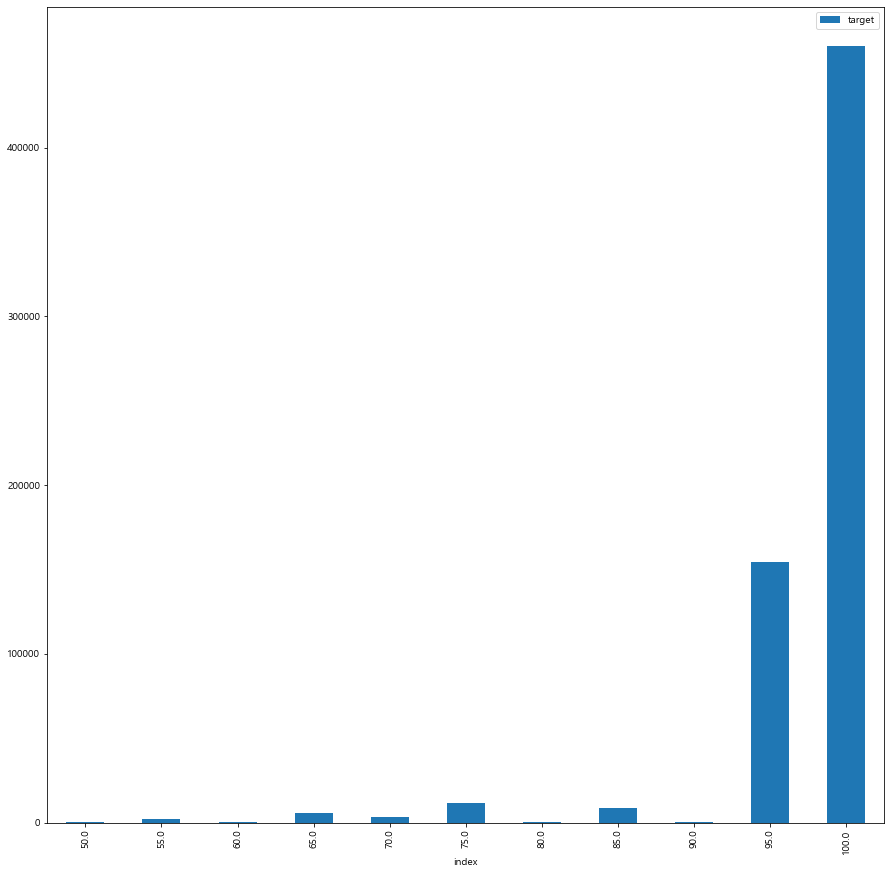

In [318]:
# plt.rcParams["figure.figsize"] = (15, 15)
# df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [319]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
7,50.0,612
6,55.0,2065
8,60.0,402
4,65.0,5889
5,70.0,3513
2,75.0,11585
10,80.0,80
3,85.0,8837
9,90.0,319
1,95.0,154334


# 나이별 확인하기

In [320]:
# target = 'target'

In [321]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [322]:
# df_man = df_man_sample

In [323]:
# int(df_man['검진당시나이'].value_counts().mean())

In [324]:
# df_man['검진당시나이'].min()

In [325]:
# df_man['검진당시나이'].max()

In [326]:
# df_man.columns

In [327]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [328]:
# df_temp.info()

In [329]:
# df_temp.reset_index(drop=True, inplace=True)

In [330]:
# df_man = df_temp.copy()

In [331]:
# df_man['검진당시나이'].value_counts()

In [332]:
# df_man[df_man['검진당시나이']==38]

In [333]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [334]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '심전도', '심전도_scaling',
       'kde_mean', 'target'],
      dtype='object')

In [335]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [336]:
target_cols

['심전도']

In [337]:
train_columns = target_cols.copy()

In [338]:
train_columns.insert(0, '검진당시나이')

In [339]:
train_columns

['검진당시나이', '심전도']

In [340]:
target_cols

['심전도']

In [341]:
target_col = 'target'

## Min Max Scaling

In [342]:
from sklearn.preprocessing import MinMaxScaler

In [343]:
scaling_bool

False

In [344]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [345]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [346]:
# model = LinearRegression()

In [347]:
# model.fit(X_train, y_train)

In [348]:
# model.intercept_

In [349]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [350]:
model = XGBRegressor()

In [351]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [352]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [353]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 785.75 seconds for 10 candidates parameter settings.


In [354]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [355]:
# best score
random_search.best_score_

-5.973695580321853e-11

In [356]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [357]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [358]:
# model = build_model()

In [359]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [360]:
# model.summary()

In [361]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [362]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [363]:
# plot_history(history)

## pyTorch 신경망

In [364]:
np.shape(X_train)[1]

2

In [365]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [366]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [367]:
# epochs = 1000

In [368]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [369]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [370]:
# plt.plot(losses)

## coef 계산

In [371]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [372]:
# df_coef.columns = ['검사항목', 'coef']

In [373]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [374]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [375]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [376]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [377]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [378]:
# slr = LinearRegression()

In [379]:
# slr.fit(X_train_poly, y_train)

In [380]:
# np.shape(X_train)

In [381]:
# np.shape(X_train_poly)

In [382]:
# np.shape(X_test)

In [383]:
# np.shape(X_test_poly)

In [384]:
# y_pred_poly = slr.predict(X_test_poly)

In [385]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [386]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [388]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [389]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [390]:
pyTorch_bool

False

In [391]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [392]:
XGB_bool

True

In [393]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [394]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 7.541629406139047e-06
MSE : 5.840156664401891e-11
RMSE : 7.642091771499406e-06


In [395]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999999999985283

In [396]:
model.score(X_test, y_test)

0.9999999999985283

## feature importance

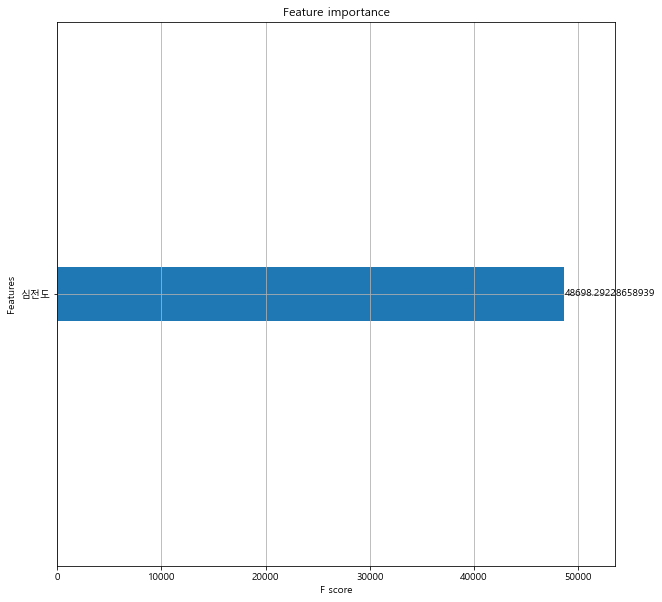

In [397]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [398]:
model.feature_importances_

array([0., 1.], dtype=float32)

In [399]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [400]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,심전도,1.0
0,검진당시나이,0.0


# 실제지수 - 예측지수 결과

In [401]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,100.0
1,100.0
2,95.0
3,100.0
4,95.0
...,...
161945,95.0
161946,100.0
161947,95.0
161948,100.0


In [402]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,99.999992
1,99.999992
2,94.999992
3,99.999992
4,94.999992
...,...
161945,94.999992
161946,99.999992
161947,94.999992
161948,99.999992


In [403]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [404]:
df_test.head()

,target,0
0,100.0,99.999992
1,100.0,99.999992
2,95.0,94.999992
3,100.0,99.999992
4,95.0,94.999992


In [405]:
df_test.columns

Index(['target', 0], dtype='object')

In [406]:
df_test.columns = ['실제지수', '예측지수']

In [407]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [408]:
df_test.head()

,실제지수,예측지수,diff
0,100.0,99.999992,-0.000008
1,100.0,99.999992,-0.000008
2,95.0,94.999992,-0.000008
3,100.0,99.999992,-0.000008
4,95.0,94.999992,-0.000008


In [409]:
df_test['diff_int'] = df_test['diff'].round(0)

In [410]:
len(df_test)

161950

In [411]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,100.0,99.999992,-0.000008,-0.0
1,100.0,99.999992,-0.000008,-0.0
2,95.0,94.999992,-0.000008,-0.0
3,100.0,99.999992,-0.000008,-0.0
4,95.0,94.999992,-0.000008,-0.0


<AxesSubplot:>

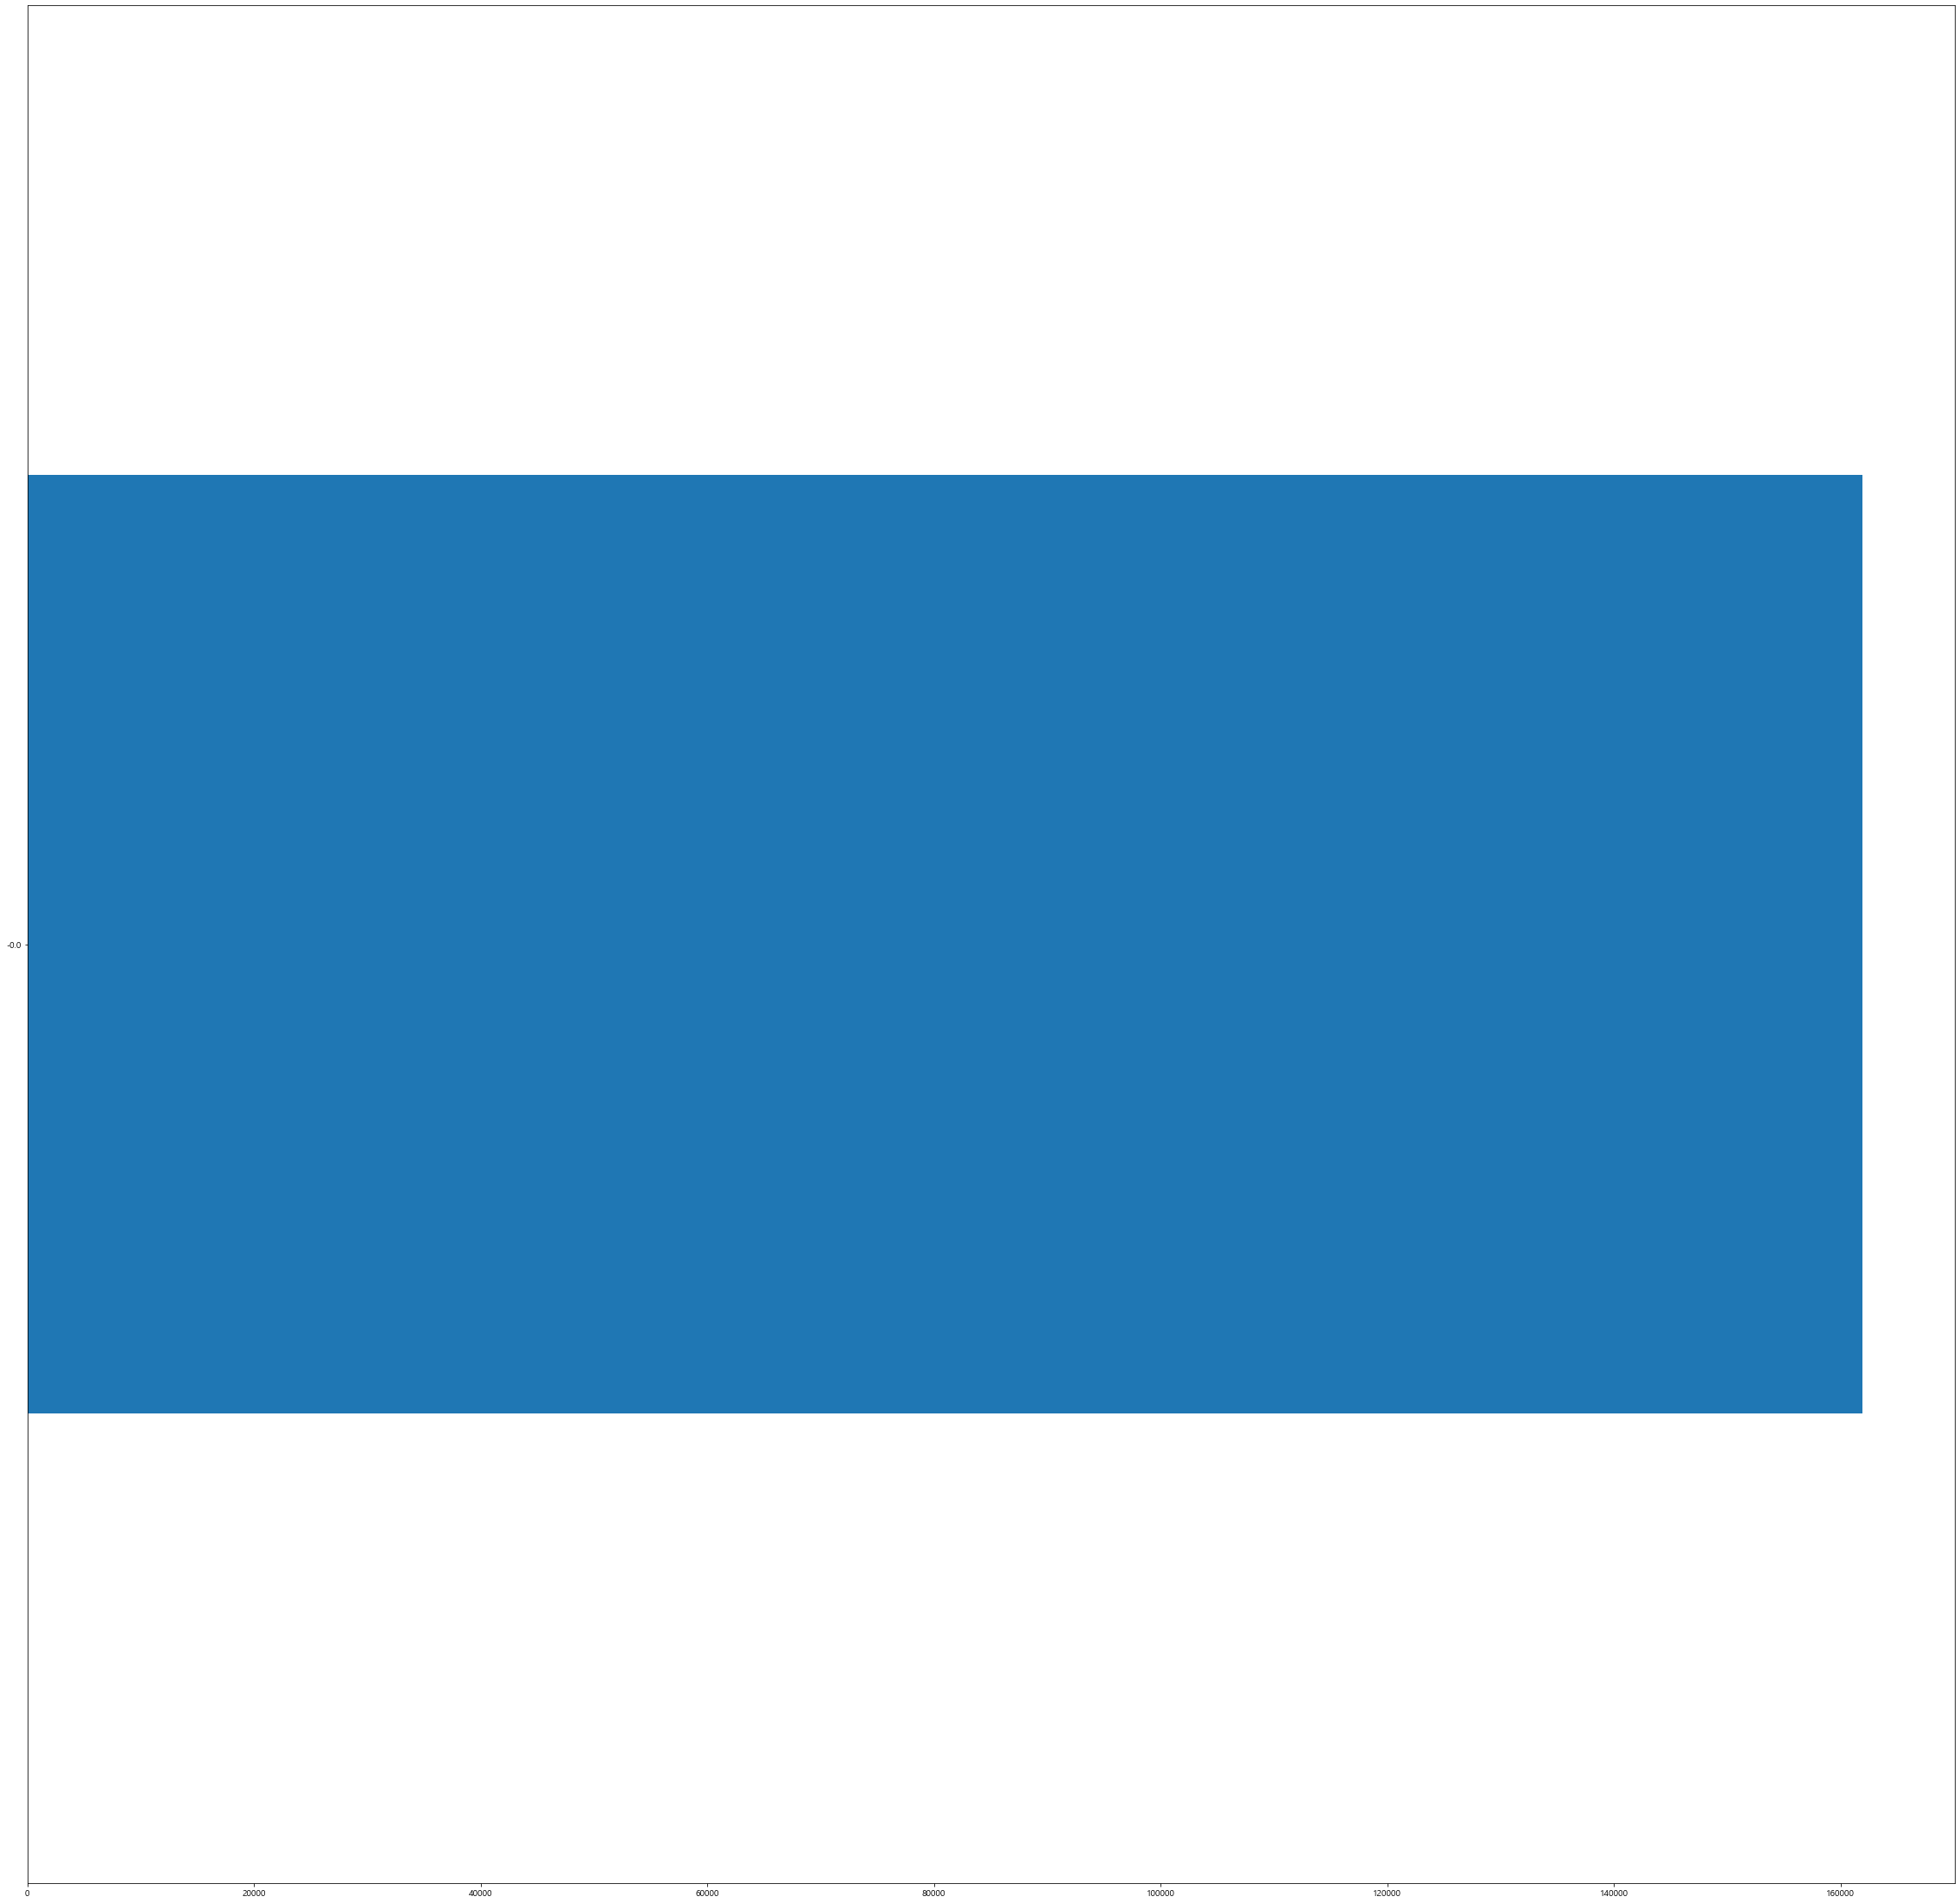

In [412]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [413]:
df_test['diff_int'].value_counts(ascending=False)

-0.0    161950
Name: diff_int, dtype: int64

In [414]:
df_test['예측지수'].round(0).value_counts()

100.0    114968
95.0      38583
75.0       2887
85.0       2295
65.0       1503
70.0        853
55.0        513
50.0        154
60.0         92
90.0         80
80.0         22
Name: 예측지수, dtype: int64

# 예측 나이 분포

In [415]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [416]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [417]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [418]:
df_plot = pd.DataFrame(y_test.value_counts())

In [419]:
df_plot.columns = ['count']

In [420]:
df_plot.reset_index(inplace=True)

In [421]:
df_plot = df_plot.sort_values('index', ascending=True)

In [422]:
df_plot

,index,count
7,50.0,154
6,55.0,513
8,60.0,92
4,65.0,1503
5,70.0,853
2,75.0,2887
10,80.0,22
3,85.0,2295
9,90.0,80
1,95.0,38583


In [423]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

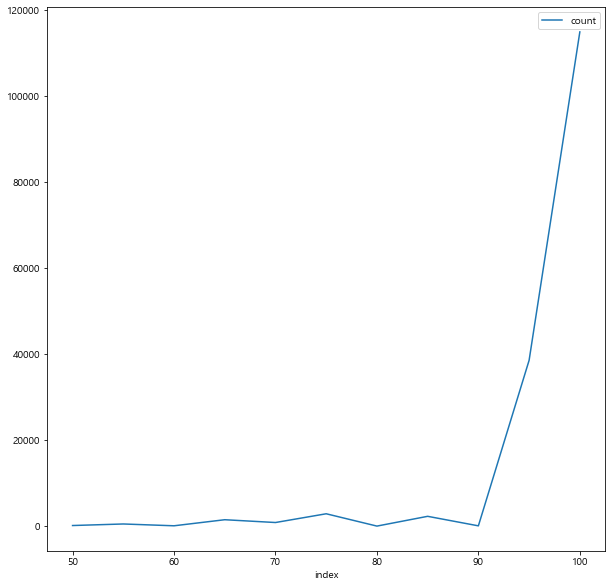

In [424]:
df_plot.plot()

In [425]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [426]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [427]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [428]:
df_plot.columns = ['count']

In [429]:
df_plot.reset_index(inplace=True)

In [430]:
df_plot = df_plot.sort_values(0, ascending=True)

In [431]:
df_plot.set_index(0, inplace=True)

In [432]:
df_plot

,count
0,
50.0,154
55.0,513
60.0,92
65.0,1503
70.0,853
75.0,2887
80.0,22
85.0,2295
90.0,80


<AxesSubplot:xlabel='0'>

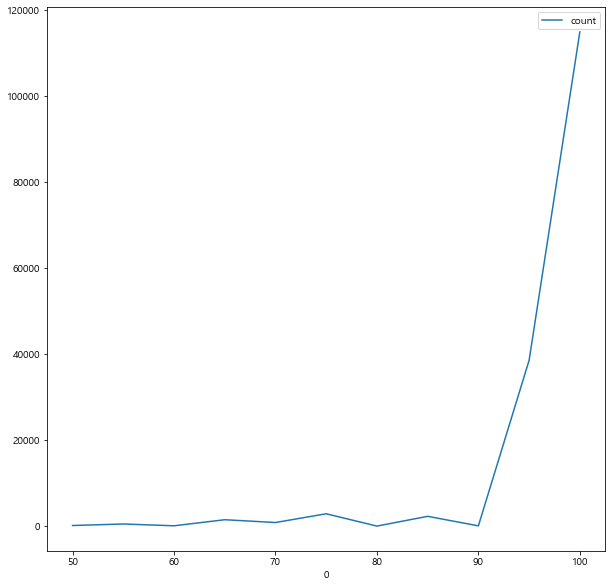

In [433]:
df_plot.plot()

# 시각화

In [434]:
# model.coef_

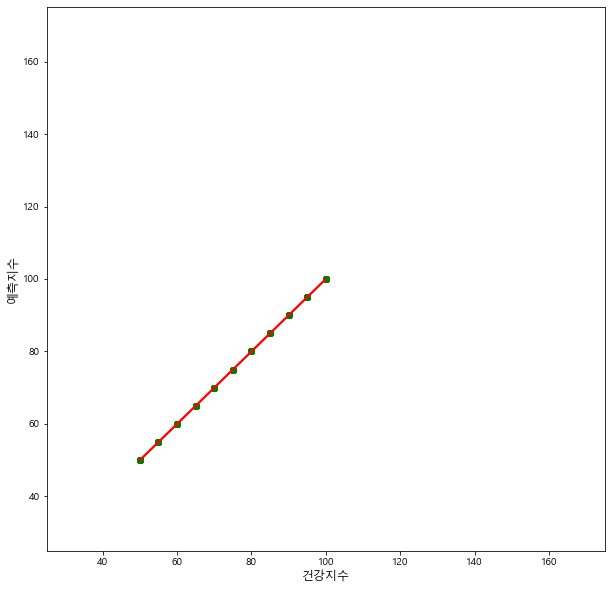

In [435]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [436]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2011,32,11757,1,24,1.0,90.0,90.0,95.0
1,2019,50,356493,1,53,0.0,100.0,100.0,100.0
2,2021,50,642497,1,55,0.0,100.0,100.0,100.0
3,2019,62,421626,1,40,0.0,100.0,100.0,100.0
4,2020,62,565527,1,41,0.0,100.0,100.0,100.0


In [437]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647799 entries, 0 to 647798
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   검진년도         647799 non-null  int64  
 1   UID          647799 non-null  int64  
 2   CU_REC_ID    647799 non-null  int64  
 3   SEX          647799 non-null  int64  
 4   검진당시나이       647799 non-null  int64  
 5   심전도          647799 non-null  float64
 6   심전도_scaling  647799 non-null  float64
 7   kde_mean     647799 non-null  float64
 8   target       647799 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 44.5 MB


In [438]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
100189,2022,168996,2259500,1,35,0.0,100.0,100.0,100.0
100190,2023,168996,2259499,1,36,0.0,100.0,100.0,100.0
100191,2024,168996,2281994,1,37,0.0,100.0,100.0,100.0


In [439]:
train_columns

['검진당시나이', '심전도']

In [440]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [441]:
len(df_pred)

647799

In [442]:
df_pred.reset_index(drop=True, inplace=True)

In [443]:
X_test

,검진당시나이,심전도
444640,39,0.0
234470,46,0.0
575903,28,1.0
28303,49,0.0
328302,48,1.0
...,...,...
191212,40,1.0
281259,55,0.0
466369,38,1.0
307631,51,0.0


In [444]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '심전도', '심전도_scaling',
       'kde_mean', 'target'],
      dtype='object')

In [445]:
df_pred[train_columns]

,검진당시나이,심전도
0,24,1.0
1,53,0.0
2,55,0.0
3,40,0.0
4,41,0.0
...,...,...
647794,29,0.0
647795,39,0.0
647796,26,0.0
647797,53,0.0


In [446]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [447]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [448]:
pred_data = pred_data.round(0)

In [449]:
pred_data

array([ 95., 100., 100., ..., 100., 100.,  95.], dtype=float32)

In [450]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [451]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [452]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target,예측지수
0,2011,32,11757,1,24,1.0,90.0,90.0,95.0,95.0
1,2019,50,356493,1,53,0.0,100.0,100.0,100.0,100.0
2,2021,50,642497,1,55,0.0,100.0,100.0,100.0,100.0
3,2019,62,421626,1,40,0.0,100.0,100.0,100.0,100.0
4,2020,62,565527,1,41,0.0,100.0,100.0,100.0,100.0
5,2021,62,699357,1,42,0.0,100.0,100.0,100.0,100.0
6,2022,62,1356310,1,43,0.0,100.0,100.0,100.0,100.0
7,2023,62,2170394,1,44,0.0,100.0,100.0,100.0,100.0
8,2019,67,410099,1,51,1.0,90.0,90.0,95.0,95.0
9,2020,67,481109,1,52,1.0,90.0,90.0,95.0,95.0


## 예측지수 성능평가

In [453]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.0

# target으로 나이 계산

In [454]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [455]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,1.0,90.0,90.0,95.0,95.0,25.0
1,2019,50,356493,1,53,0.0,100.0,100.0,100.0,100.0,53.0
2,2021,50,642497,1,55,0.0,100.0,100.0,100.0,100.0,55.0
3,2019,62,421626,1,40,0.0,100.0,100.0,100.0,100.0,40.0
4,2020,62,565527,1,41,0.0,100.0,100.0,100.0,100.0,41.0
5,2021,62,699357,1,42,0.0,100.0,100.0,100.0,100.0,42.0
6,2022,62,1356310,1,43,0.0,100.0,100.0,100.0,100.0,43.0
7,2023,62,2170394,1,44,0.0,100.0,100.0,100.0,100.0,44.0
8,2019,67,410099,1,51,1.0,90.0,90.0,95.0,95.0,52.0
9,2020,67,481109,1,52,1.0,90.0,90.0,95.0,95.0,53.0


## 예측나이 성능평가

In [456]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

0.5093400885151104

# 최종 산출

In [457]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,1.0,90.0,90.0,95.0,95.0,25.0
1,2019,50,356493,1,53,0.0,100.0,100.0,100.0,100.0,53.0
2,2021,50,642497,1,55,0.0,100.0,100.0,100.0,100.0,55.0
3,2019,62,421626,1,40,0.0,100.0,100.0,100.0,100.0,40.0
4,2020,62,565527,1,41,0.0,100.0,100.0,100.0,100.0,41.0


# DataMart csv

In [458]:
df_copy = df.copy()

In [459]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도
0,2010,7282,2520,1,42,좌심실비대,5.0
1,2010,7490,3638,1,39,없음,0.0
2,2010,7915,3997,1,36,없음,0.0
3,2010,8056,4745,1,42,없음,0.0
4,2010,8457,3929,1,38,없음,0.0


In [460]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   심전도_text   1014363 non-null  object 
 6   심전도        987115 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 64.8+ MB


In [461]:
minimums

[]

In [462]:
maximums

[]

In [463]:
train_columns

['검진당시나이', '심전도']

In [464]:
target_cols

['심전도']

In [466]:
# for idx, col in enumerate(target_cols):    
#     df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
#     df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [467]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [468]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도
0,2010,7282,2520,1,42,좌심실비대,5.0
1,2010,7490,3638,1,39,없음,0.0
2,2010,7915,3997,1,36,없음,0.0
3,2010,8056,4745,1,42,없음,0.0
4,2010,8457,3929,1,38,없음,0.0


## 검진 항목 all 결측치 지우기

In [469]:
target_cols

['심전도']

In [470]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [471]:
df_man_csv.reset_index(drop=True, inplace=True)

In [472]:
len(df_man_csv)

621870

## fillna

In [473]:
df_man_csv.isnull().sum()

검진년도         0
UID          0
CU_REC_ID    0
SEX          0
검진당시나이       0
심전도_text     0
심전도          0
dtype: int64

In [474]:
df_man_csv[severity_target].fillna(fill_th, inplace=True)

In [475]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 스크리닝

In [476]:
# screening = 80

In [477]:
# scr_col = 'ALP'

In [478]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [479]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [480]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [481]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [482]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [483]:
# len(df_man_csv)

## 모델 예측

In [484]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [485]:
pred_data = pred_data.round(0)

In [486]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [487]:
df_man_csv.head(200)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수
0,2010,7282,2520,1,42,좌심실비대,5.0,75.0
1,2010,7490,3638,1,39,없음,0.0,100.0
2,2010,7915,3997,1,36,없음,0.0,100.0
3,2010,8056,4745,1,42,없음,0.0,100.0
4,2010,8457,3929,1,38,없음,0.0,100.0
5,2010,11158,1703,1,37,없음,0.0,100.0
6,2010,13020,2211,1,34,없음,0.0,100.0
7,2010,13999,3816,1,53,없음,0.0,100.0
8,2010,15783,1431,1,41,없음,0.0,100.0
9,2011,135154,6627,1,28,없음,0.0,100.0


### 성능 평가

In [488]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [489]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [490]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [491]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 0.38080627783941984


In [492]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9736004976833305

In [493]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
0,2010,7282,2520,1,42,좌심실비대,5.0,75.0,47.0
1,2010,7490,3638,1,39,없음,0.0,100.0,39.0
2,2010,7915,3997,1,36,없음,0.0,100.0,36.0
3,2010,8056,4745,1,42,없음,0.0,100.0,42.0
4,2010,8457,3929,1,38,없음,0.0,100.0,38.0


In [494]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621870 entries, 0 to 621869
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       621870 non-null  int64  
 1   UID        621870 non-null  int64  
 2   CU_REC_ID  621870 non-null  int64  
 3   SEX        621870 non-null  int64  
 4   검진당시나이     621870 non-null  int64  
 5   심전도_text   621870 non-null  object 
 6   심전도        621870 non-null  float64
 7   예측지수       621870 non-null  float32
 8   예측나이       621870 non-null  float64
dtypes: float32(1), float64(2), int64(5), object(1)
memory usage: 40.3+ MB


# 최종 UID별 확인

In [495]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
222624,2022,175673,751348,1,48,없음,0.0,100.0,48.0
222625,2022,175673,1463838,1,48,없음,0.0,100.0,48.0
222575,2022,175673,1919125,1,48,없음,0.0,100.0,48.0
222626,2022,175673,2169120,1,48,없음,0.0,100.0,48.0
222576,2022,175673,2223795,1,48,없음,0.0,100.0,48.0
222577,2022,175673,2237465,1,48,없음,0.0,100.0,48.0
222627,2022,175673,2238320,1,48,없음,0.0,100.0,48.0
222628,2022,175673,2246042,1,48,없음,0.0,100.0,48.0
364984,2023,175673,1463893,1,49,없음,0.0,100.0,49.0
364980,2023,175673,1919126,1,49,없음,0.0,100.0,49.0


In [496]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
157675,2021,289587,796178,1,47,없음,0.0,100.0,47.0
250335,2022,289587,866076,1,48,없음,0.0,100.0,48.0
250295,2022,289587,2115999,1,48,없음,0.0,100.0,48.0
78242,2022,289587,2603574,1,48,없음,0.0,100.0,48.0
407870,2023,289587,1487447,1,49,없음,0.0,100.0,49.0
407871,2023,289587,2227964,1,49,없음,0.0,100.0,49.0
566383,2024,289587,2243723,1,50,없음,0.0,100.0,50.0
566366,2024,289587,2603575,1,50,없음,0.0,100.0,50.0


In [497]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
339240,2022,897603,1066133,1,51,없음,0.0,100.0,51.0
339251,2022,897603,1068885,1,51,없음,0.0,100.0,51.0
339252,2022,897603,1728532,1,51,없음,0.0,100.0,51.0
339253,2022,897603,2555144,1,51,없음,0.0,100.0,51.0
488091,2023,897603,1458387,1,52,없음,0.0,100.0,52.0
488092,2023,897603,1728531,1,52,없음,0.0,100.0,52.0
477930,2023,897603,2120063,1,52,없음,0.0,100.0,52.0
477931,2023,897603,2351665,1,52,없음,0.0,100.0,52.0
488093,2023,897603,2555143,1,52,없음,0.0,100.0,52.0
477932,2023,897603,2622260,1,52,없음,0.0,100.0,52.0


In [498]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
208902,2022,119172,751336,1,41,없음,0.0,100.0,41.0
208903,2022,119172,1432355,1,41,없음,0.0,100.0,41.0
208900,2022,119172,1432476,1,41,없음,0.0,100.0,41.0
208904,2022,119172,2247083,1,41,없음,0.0,100.0,41.0
208905,2022,119172,2252956,1,41,없음,0.0,100.0,41.0
352840,2023,119172,1436742,1,42,없음,0.0,100.0,42.0
352841,2023,119172,2247082,1,42,없음,0.0,100.0,42.0
352842,2023,119172,2252955,1,42,없음,0.0,100.0,42.0
550283,2024,119172,2250063,1,43,없음,0.0,100.0,43.0
550284,2024,119172,2252954,1,43,없음,0.0,100.0,43.0


In [499]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
488086,2023,897595,1525045,1,40,없음,0.0,100.0,40.0
488087,2023,897595,1593851,1,40,없음,0.0,100.0,40.0
488084,2023,897595,2005289,1,40,없음,0.0,100.0,40.0
488085,2023,897595,2138998,1,40,없음,0.0,100.0,40.0
474028,2023,897595,2320478,1,40,없음,0.0,100.0,40.0
488088,2023,897595,2328772,1,40,없음,0.0,100.0,40.0


In [500]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
293269,2022,492764,909688,1,39,없음,0.0,100.0,39.0
293270,2022,492764,1575802,1,39,없음,0.0,100.0,39.0
293273,2022,492764,1668547,1,39,없음,0.0,100.0,39.0
293271,2022,492764,2246777,1,39,없음,0.0,100.0,39.0
293272,2022,492764,2330256,1,39,없음,0.0,100.0,39.0
116533,2022,492764,2343199,1,39,없음,0.0,100.0,39.0
131726,2022,492764,2363393,1,39,없음,0.0,100.0,39.0
131727,2022,492764,2639564,1,39,없음,0.0,100.0,39.0
131728,2022,492764,2703924,1,39,없음,0.0,100.0,39.0
293274,2022,492764,2783328,1,39,없음,0.0,100.0,39.0


In [501]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
491716,2023,933936,1431742,1,40,없음,0.0,100.0,40.0
491717,2023,933936,1435266,1,40,없음,0.0,100.0,40.0
604107,2024,933936,2242997,1,41,없음,0.0,100.0,41.0


In [502]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
220472,2022,168996,919754,1,35,없음,0.0,100.0,35.0
220473,2022,168996,1425925,1,35,없음,0.0,100.0,35.0
220474,2022,168996,2259500,1,35,없음,0.0,100.0,35.0
363056,2023,168996,1425970,1,36,없음,0.0,100.0,36.0
363057,2023,168996,1475832,1,36,없음,0.0,100.0,36.0
363058,2023,168996,2259499,1,36,없음,0.0,100.0,36.0
554806,2024,168996,2281994,1,37,없음,0.0,100.0,37.0


# 여성 모델

In [503]:
df_target['SEX'].value_counts()

1    765459
2    448440
Name: SEX, dtype: int64

In [504]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

448440

# 결측치 처리

## 결측치 삭제

In [505]:
# df_woman.dropna(inplace=True)

In [506]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
10,2010,15894,2533,2,29,0.0,100.0,100.0,100.0
22,2010,42223,1364,2,24,0.0,100.0,100.0,100.0
37,2011,364096,6645,2,32,1.0,90.0,90.0,95.0
45,2010,120518,3595,2,30,0.0,100.0,100.0,100.0
63,2011,698706,6600,2,36,1.0,90.0,90.0,95.0


## 결측치 평균으로 대체

In [507]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [508]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [509]:
target_cols

['심전도']

In [510]:
len(df_woman)

448440

In [511]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [512]:
len(df_woman)

448440

In [513]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
10,2010,15894,2533,2,29,0.0,100.0,100.0,100.0
22,2010,42223,1364,2,24,0.0,100.0,100.0,100.0
37,2011,364096,6645,2,32,1.0,90.0,90.0,95.0
45,2010,120518,3595,2,30,0.0,100.0,100.0,100.0
63,2011,698706,6600,2,36,1.0,90.0,90.0,95.0


In [514]:
len(df_woman)

448440

## fillna

In [515]:
df_woman.mean().round(2)

검진년도              2021.84
UID             498433.18
CU_REC_ID      1483001.65
SEX                  2.00
검진당시나이              38.56
심전도                  0.41
심전도_scaling         95.92
kde_mean            95.92
target              97.96
dtype: float64

In [516]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [517]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [518]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [519]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [520]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
10,2010,15894,2533,2,29,0.0,100.0,100.0,100.0
22,2010,42223,1364,2,24,0.0,100.0,100.0,100.0
37,2011,364096,6645,2,32,1.0,90.0,90.0,95.0
45,2010,120518,3595,2,30,0.0,100.0,100.0,100.0
63,2011,698706,6600,2,36,1.0,90.0,90.0,95.0


# 중복 제거

In [521]:
len(df_woman)

448440

In [522]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [523]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
172467,2022,48,1140655,2,34,1.0,90.0,90.0,95.0
385421,2023,48,2484053,2,35,1.0,90.0,90.0,95.0
261102,2021,53,2632765,2,26,0.0,100.0,100.0,100.0
261101,2021,53,664316,2,26,0.0,100.0,100.0,100.0
385422,2023,53,2632764,2,28,1.0,90.0,90.0,95.0
1078542,2024,53,2658222,2,29,0.0,100.0,100.0,100.0
139207,2020,54,497669,2,30,0.0,100.0,100.0,100.0
419134,2022,54,1319859,2,32,1.0,90.0,90.0,95.0
691582,2023,54,2039511,2,33,0.0,100.0,100.0,100.0
1078543,2024,54,2750990,2,34,0.0,100.0,100.0,100.0


## first만 남겨두고 중복 제거

In [524]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [525]:
df_woman.reset_index(drop=True, inplace=True)

In [526]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2022,48,1140655,2,34,1.0,90.0,90.0,95.0
1,2023,48,2484053,2,35,1.0,90.0,90.0,95.0
2,2021,53,2632765,2,26,0.0,100.0,100.0,100.0
3,2023,53,2632764,2,28,1.0,90.0,90.0,95.0
4,2024,53,2658222,2,29,0.0,100.0,100.0,100.0
5,2020,54,497669,2,30,0.0,100.0,100.0,100.0
6,2022,54,1319859,2,32,1.0,90.0,90.0,95.0
7,2023,54,2039511,2,33,0.0,100.0,100.0,100.0
8,2024,54,2750990,2,34,0.0,100.0,100.0,100.0
9,2019,56,1605927,2,30,1.0,90.0,90.0,95.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

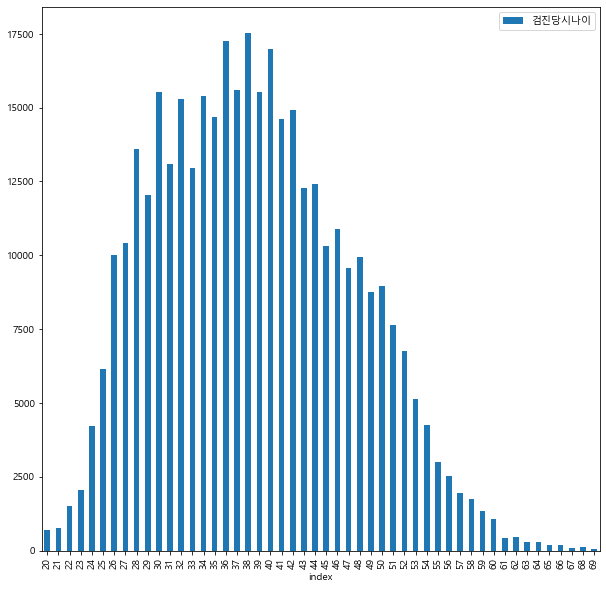

In [527]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [528]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,681
39,21,769
36,22,1521
33,23,2062
30,24,4219
27,25,6146
20,26,10005
18,27,10430
11,28,13597
16,29,12031


# 검진항목 시각화

In [529]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
count,381463.000000,3.814630e+05,3.814630e+05,381463.0,381463.000000,381463.000000,381463.000000,381463.000000,381463.000000
mean,2021.777176,4.935726e+05,1.471011e+06,2.0,38.584156,0.418851,95.811494,95.811494,97.905747
std,1.733624,3.650641e+05,8.084615e+05,0.0,8.567008,1.108081,11.080811,11.080811,5.540406
min,2010.000000,4.800000e+01,2.130000e+02,2.0,20.000000,0.000000,0.000000,0.000000,50.000000
25%,2021.000000,2.154040e+05,6.447885e+05,2.0,32.000000,0.000000,90.000000,90.000000,95.000000
50%,2022.000000,3.697130e+05,1.381949e+06,2.0,38.000000,0.000000,100.000000,100.000000,100.000000
75%,2023.000000,8.228600e+05,2.169960e+06,2.0,45.000000,1.000000,100.000000,100.000000,100.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,10.000000,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='검진당시나이'>

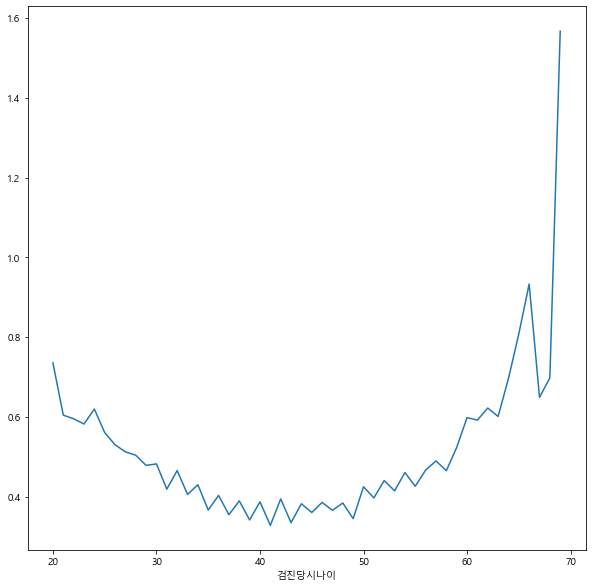

In [530]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

In [531]:
# df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [532]:
# df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

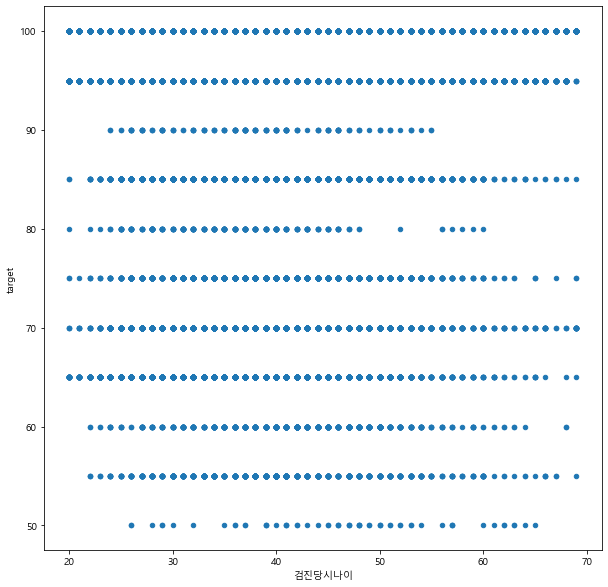

In [533]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

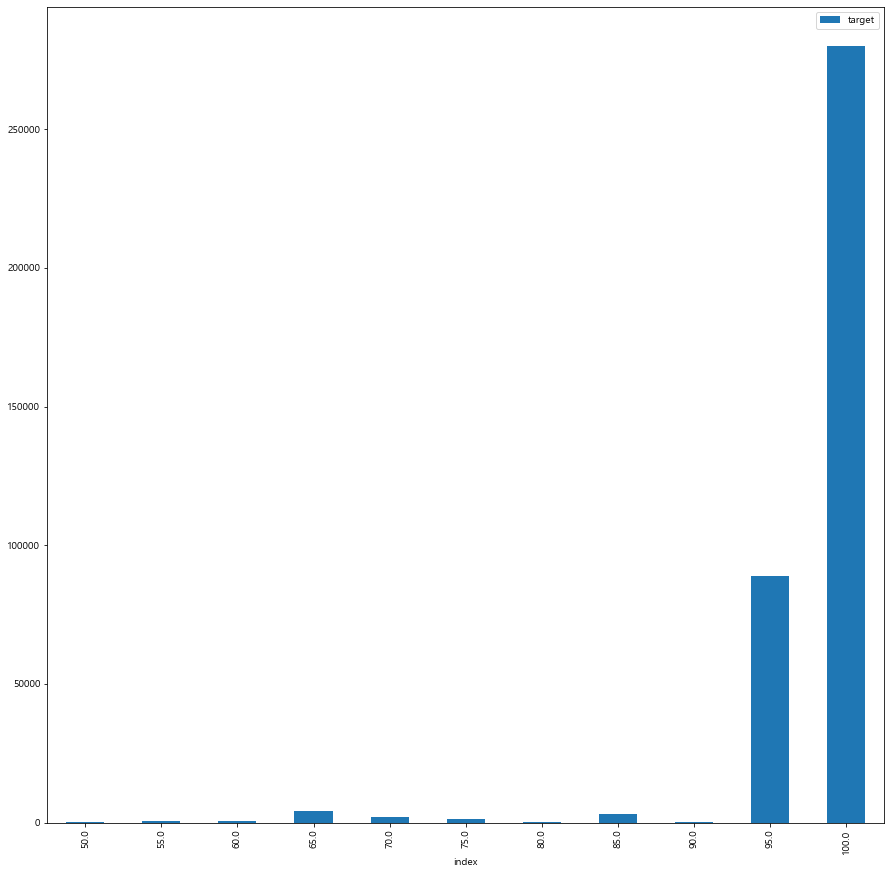

In [534]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [535]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
10,50.0,59
6,55.0,704
7,60.0,595
2,65.0,4069
4,70.0,2162
5,75.0,1433
8,80.0,238
3,85.0,3107
9,90.0,144
1,95.0,88909


In [536]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [537]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

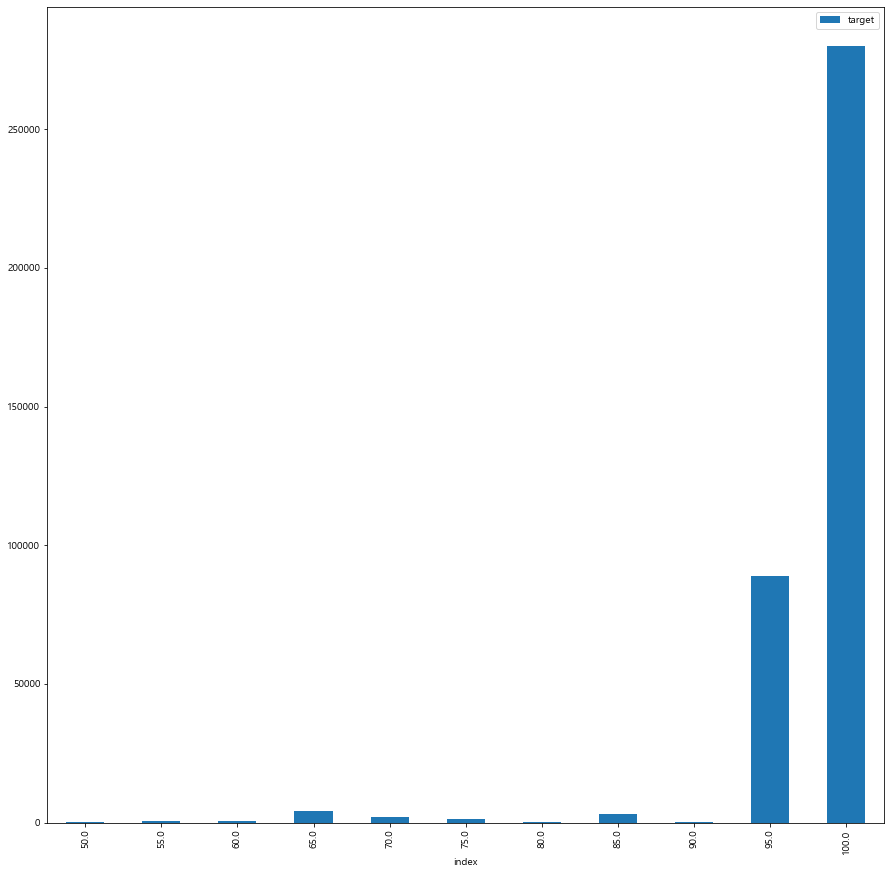

In [538]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [539]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
10,50.0,59
6,55.0,704
7,60.0,595
2,65.0,4069
4,70.0,2162
5,75.0,1433
8,80.0,238
3,85.0,3107
9,90.0,144
1,95.0,88909


# 나이별 확인하기

In [540]:
# df_woman['검진당시나이'].value_counts()

In [541]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [542]:
# df_woman['검진당시나이'].min()

In [543]:
# df_woman['검진당시나이'].max()

In [544]:
# df_woman.columns

In [545]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [546]:
# df_temp.info()

In [547]:
# df_temp.reset_index(drop=True, inplace=True)

In [548]:
# df_woman = df_temp.copy()

In [549]:
# df_woman['검진당시나이'].value_counts()

In [550]:
# df_woman[df_woman['검진당시나이']==20]

In [551]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [552]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [553]:
train_columns

['검진당시나이', '심전도']

In [554]:
# target_col = '검진당시나이'

In [555]:
target_col

'target'

## Min Max Scaling

In [556]:
from sklearn.preprocessing import MinMaxScaler

In [557]:
scaling_bool

False

In [558]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [559]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [560]:
# model2 = LinearRegression()

In [561]:
# model2.fit(X_train2, y_train2)

In [562]:
# model2.intercept_

In [563]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [564]:
model2 = XGBRegressor()

In [565]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [566]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [567]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 520.80 seconds for 10 candidates parameter settings.


In [568]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [569]:
# best score
random_search.best_score_

-6.12389875356824e-11

In [570]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [571]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [572]:
# model = build_model()

In [573]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [574]:
# model.summary()

In [575]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [576]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [577]:
# plot_history(history)

## pyTorch 신경망

In [578]:
np.shape(X_train)[1]

2

In [579]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [580]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [581]:
# epochs = 1000

In [582]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [583]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [584]:
# plt.plot(losses)

## coef 계산

In [585]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [586]:
# df_coef2.columns = ['검사항목', 'coef']

In [587]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [588]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [589]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [590]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [591]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [592]:
# slr2 = LinearRegression()

In [593]:
# slr2.fit(X_train2_poly, y_train2)

In [594]:
# np.shape(X_train2)

In [595]:
# np.shape(X_train2_poly)

In [596]:
# np.shape(X_test2)

In [597]:
# np.shape(X_test2_poly)

In [598]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [599]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [600]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [601]:
import pickle
with open(model_path_woman, 'wb') as f:
    pickle.dump(model2, f)

In [602]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [603]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [604]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [605]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 7.520592897937289e-06
MSE : 5.916684279302107e-11
RMSE : 7.691998621491106e-06


In [606]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9999999999980849

In [607]:
model2.score(X_test2, y_test2)

0.9999999999980849

## feature importance

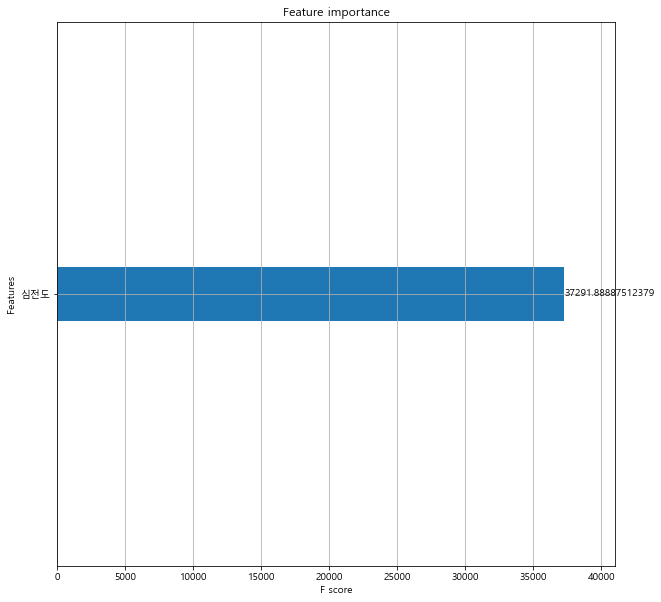

In [608]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [609]:
model2.feature_importances_

array([0., 1.], dtype=float32)

In [610]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [611]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,심전도,1.0
0,검진당시나이,0.0


# 실제나이 - 예측나이 결과

In [612]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [613]:
df_test2.head()

,target,0
0,100.0,99.999992
1,95.0,94.999992
2,100.0,99.999992
3,100.0,99.999992
4,95.0,94.999992


In [614]:
df_test2.columns

Index(['target', 0], dtype='object')

In [615]:
df_test2.columns = ['실제지수', '예측지수']

In [616]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [617]:
df_test2.head()

,실제지수,예측지수,diff
0,100.0,99.999992,-0.000008
1,95.0,94.999992,-0.000008
2,100.0,99.999992,-0.000008
3,100.0,99.999992,-0.000008
4,95.0,94.999992,-0.000008


In [618]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [619]:
len(df_test2)

95366

In [620]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,100.0,99.999992,-0.000008,-0.0
1,95.0,94.999992,-0.000008,-0.0
2,100.0,99.999992,-0.000008,-0.0
3,100.0,99.999992,-0.000008,-0.0
4,95.0,94.999992,-0.000008,-0.0


<AxesSubplot:>

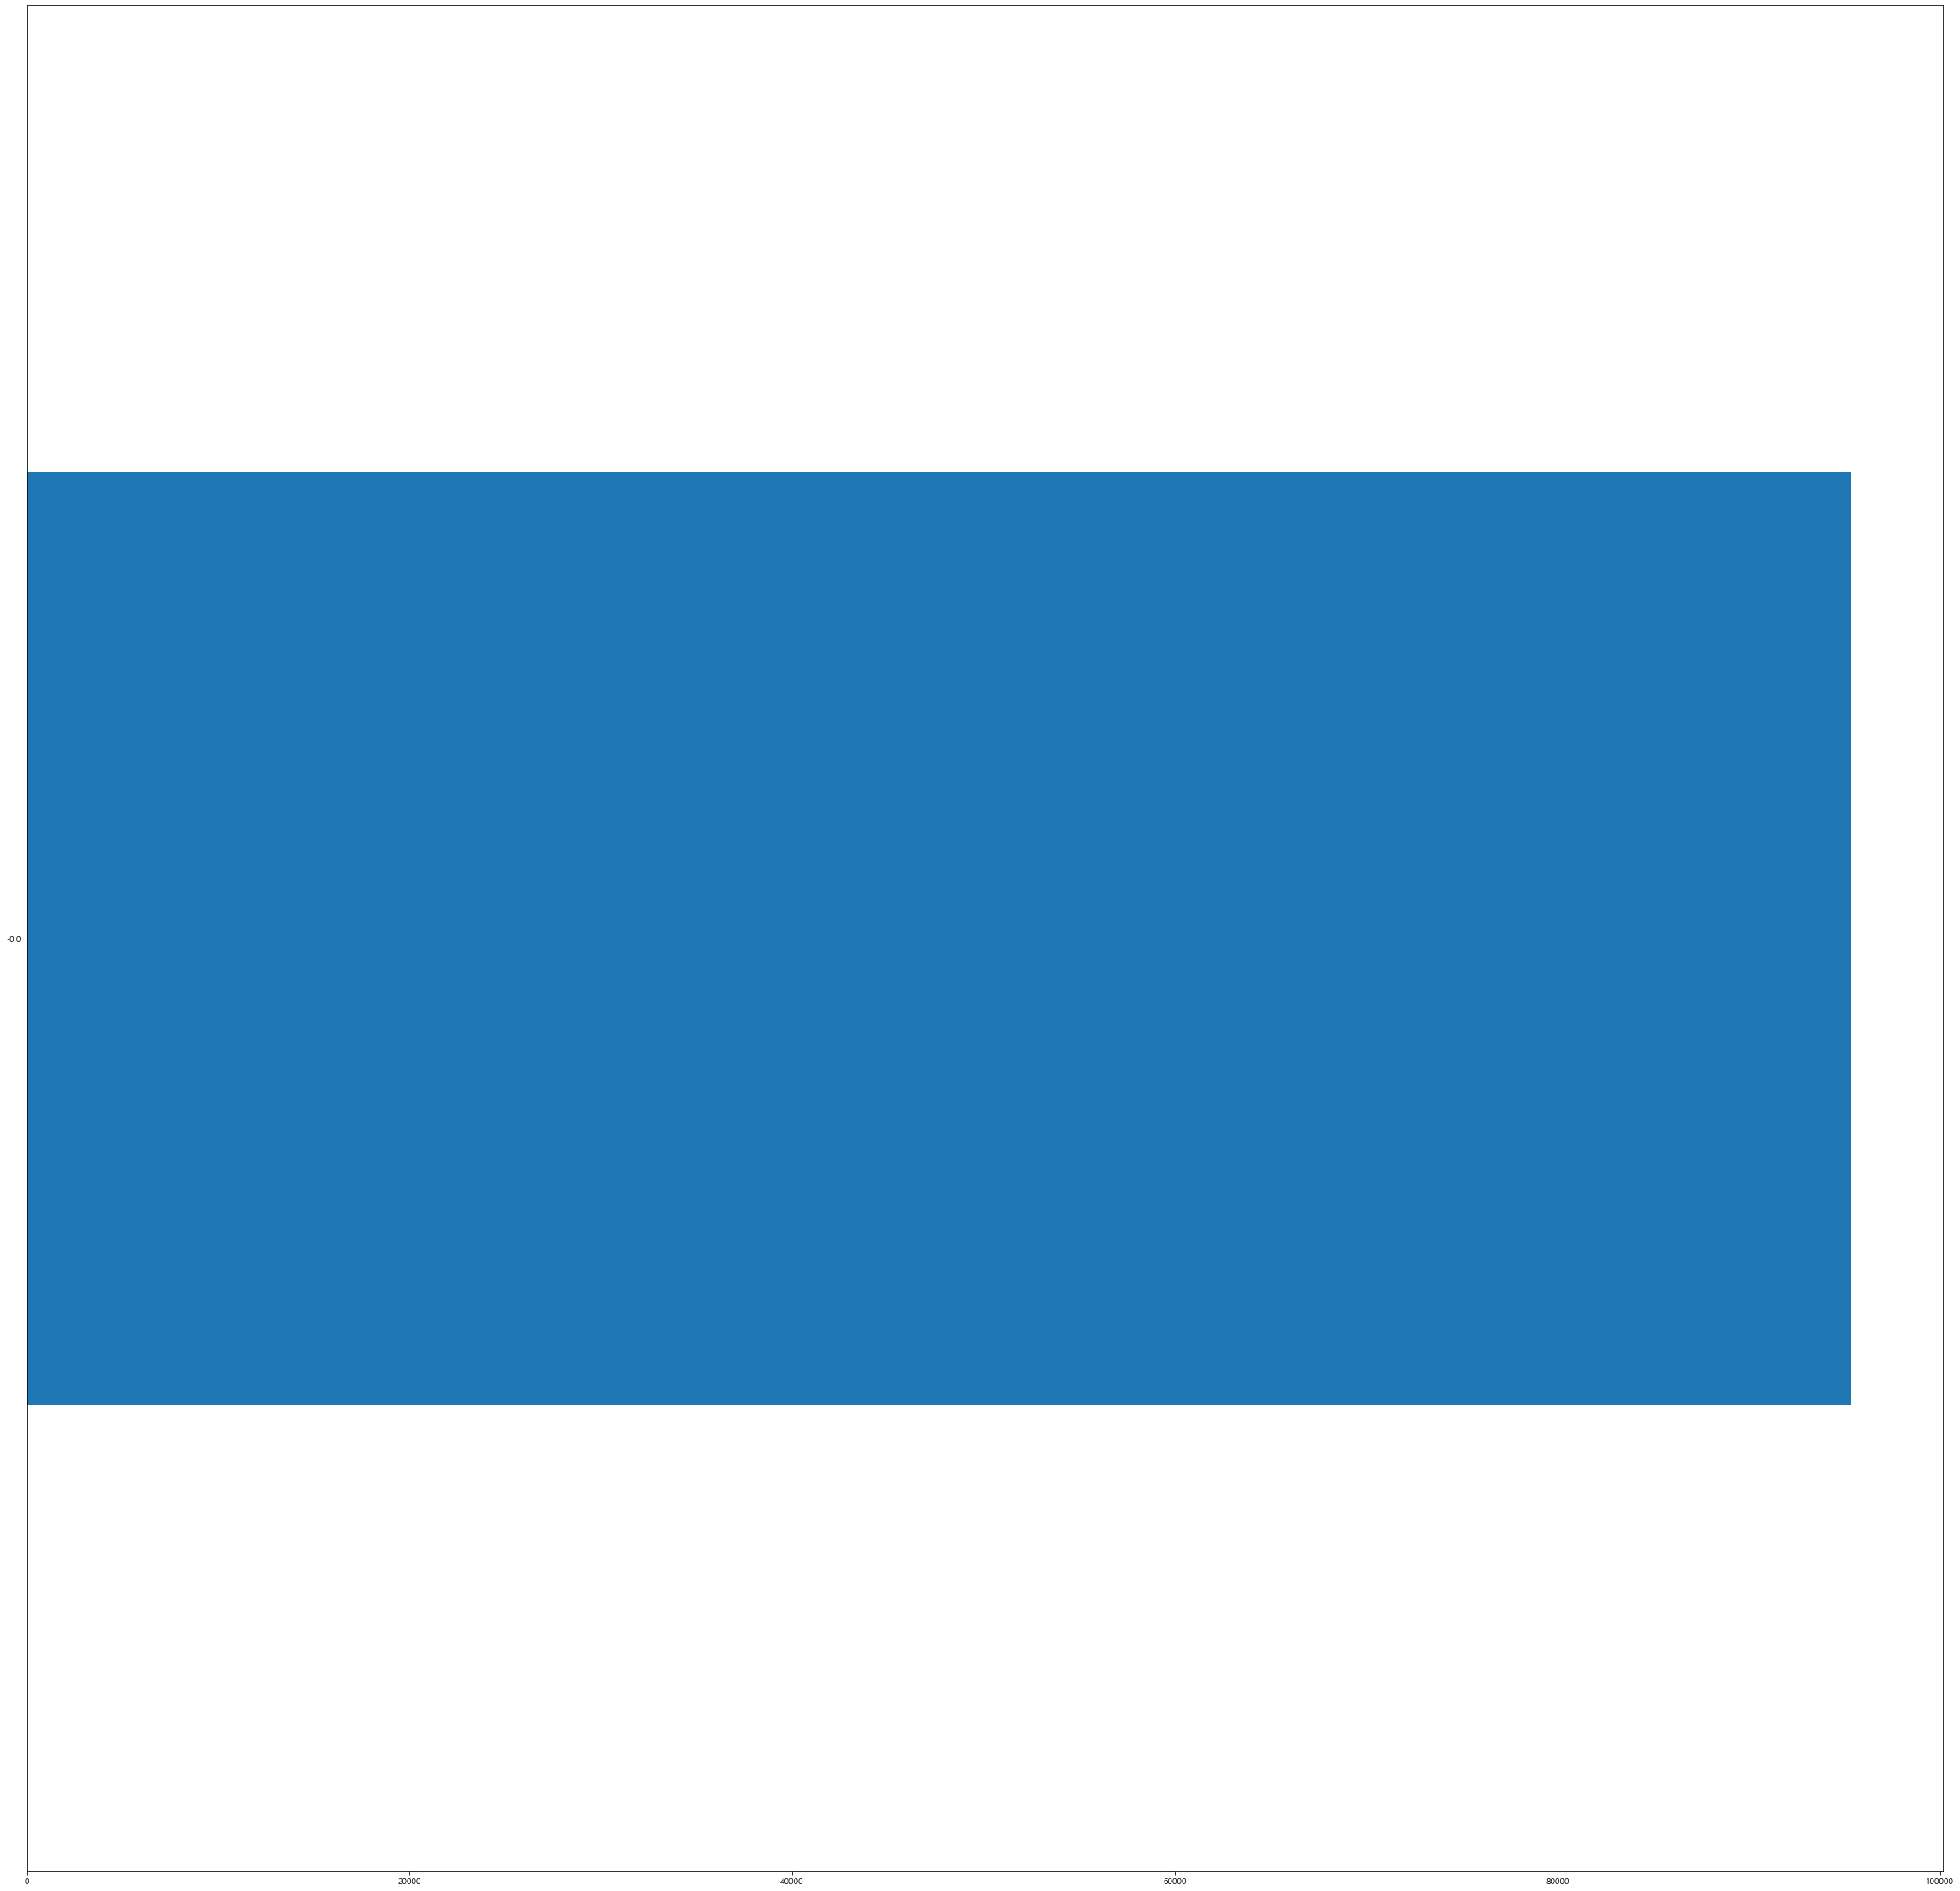

In [621]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [622]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [623]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [624]:
df_train2.round(0).value_counts()

100.0    210055
95.0      66722
65.0       3031
85.0       2305
70.0       1628
75.0       1052
55.0        531
60.0        442
80.0        177
90.0        103
50.0         51
dtype: int64

In [625]:
y_test2.value_counts()

100.0    69988
95.0     22187
65.0      1038
85.0       802
70.0       534
75.0       381
55.0       173
60.0       153
80.0        61
90.0        41
50.0         8
Name: target, dtype: int64

In [626]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [627]:
df_plot.columns = ['count']

In [628]:
df_plot.reset_index(inplace=True)

In [629]:
df_plot = df_plot.sort_values('index', ascending=True)

In [630]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

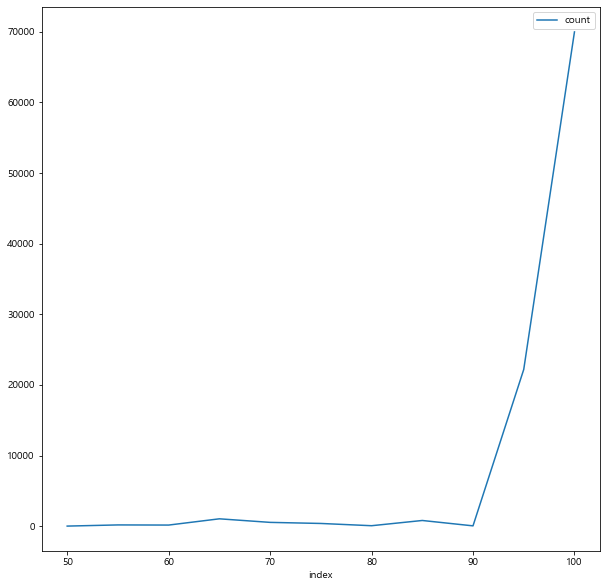

In [631]:
df_plot.plot()

In [632]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [633]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [634]:
df_test2.round(0).value_counts()

100.0    69988
95.0     22187
65.0      1038
85.0       802
70.0       534
75.0       381
55.0       173
60.0       153
80.0        61
90.0        41
50.0         8
dtype: int64

In [635]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [636]:
df_plot2.columns = ['count']

In [637]:
df_plot2.reset_index(inplace=True)

In [638]:
df_plot2

,0,count
0,100.0,69988
1,95.0,22187
2,65.0,1038
3,85.0,802
4,70.0,534
5,75.0,381
6,55.0,173
7,60.0,153
8,80.0,61
9,90.0,41


In [639]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [640]:
df_plot2.set_index(0, inplace=True)

In [641]:
df_plot2

,count
0,
50.0,8
55.0,173
60.0,153
65.0,1038
70.0,534
75.0,381
80.0,61
85.0,802
90.0,41


<AxesSubplot:xlabel='0'>

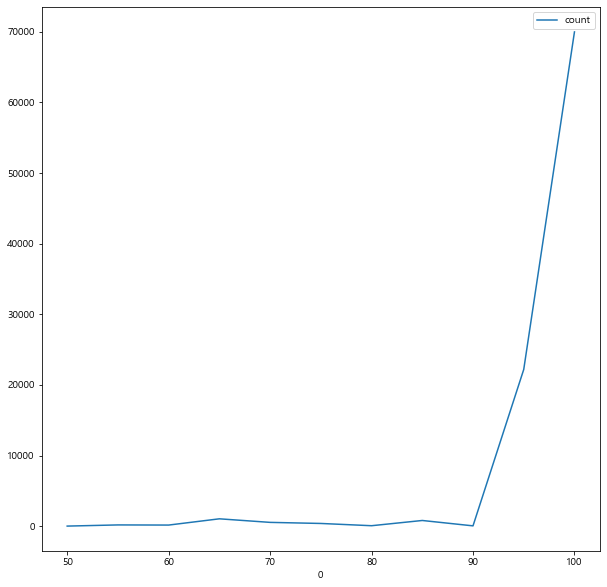

In [642]:
df_plot2.plot()

# 시각화

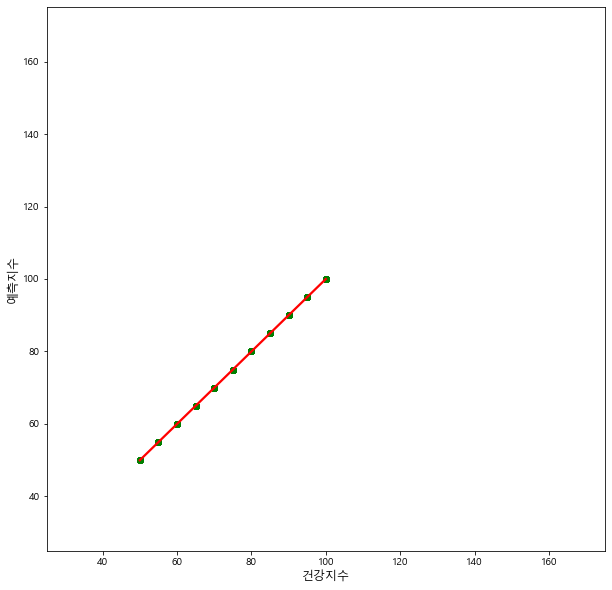

In [643]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [644]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
0,2022,48,1140655,2,34,1.0,90.0,90.0,95.0
1,2023,48,2484053,2,35,1.0,90.0,90.0,95.0
2,2021,53,2632765,2,26,0.0,100.0,100.0,100.0
3,2023,53,2632764,2,28,1.0,90.0,90.0,95.0
4,2024,53,2658222,2,29,0.0,100.0,100.0,100.0


In [645]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381463 entries, 0 to 381462
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   검진년도         381463 non-null  int64  
 1   UID          381463 non-null  int64  
 2   CU_REC_ID    381463 non-null  int64  
 3   SEX          381463 non-null  int64  
 4   검진당시나이       381463 non-null  int64  
 5   심전도          381463 non-null  float64
 6   심전도_scaling  381463 non-null  float64
 7   kde_mean     381463 non-null  float64
 8   target       381463 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.2 MB


In [646]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target
82231,2021,196909,2495703,2,28,0.0,100.0,100.0,100.0
82232,2022,196909,2495702,2,29,0.0,100.0,100.0,100.0
82233,2023,196909,2495700,2,30,0.0,100.0,100.0,100.0
82234,2024,196909,2495697,2,31,0.0,100.0,100.0,100.0


In [647]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [648]:
len(df_pred2)

381463

In [649]:
df_pred2.reset_index(drop=True, inplace=True)

In [650]:
X_test2

,검진당시나이,심전도
119075,35,0.0
274481,34,1.0
261462,29,0.0
49480,34,0.0
166637,30,1.0
...,...,...
84505,40,0.0
68275,40,1.0
53978,50,0.0
336323,40,0.0


In [651]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '심전도', '심전도_scaling',
       'kde_mean', 'target'],
      dtype='object')

In [652]:
df_pred2[train_columns]

,검진당시나이,심전도
0,34,1.0
1,35,1.0
2,26,0.0
3,28,1.0
4,29,0.0
...,...,...
381458,60,1.0
381459,62,1.0
381460,56,0.0
381461,30,1.0


In [653]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [654]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [655]:
pred_data2

array([94.99999, 94.99999, 99.99999, ..., 99.99999, 94.99999, 94.99999],
      dtype=float32)

In [656]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [657]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [658]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target,예측지수
0,2022,48,1140655,2,34,1.0,90.0,90.0,95.0,94.999992
1,2023,48,2484053,2,35,1.0,90.0,90.0,95.0,94.999992
2,2021,53,2632765,2,26,0.0,100.0,100.0,100.0,99.999992
3,2023,53,2632764,2,28,1.0,90.0,90.0,95.0,94.999992
4,2024,53,2658222,2,29,0.0,100.0,100.0,100.0,99.999992
5,2020,54,497669,2,30,0.0,100.0,100.0,100.0,99.999992
6,2022,54,1319859,2,32,1.0,90.0,90.0,95.0,94.999992
7,2023,54,2039511,2,33,0.0,100.0,100.0,100.0,99.999992
8,2024,54,2750990,2,34,0.0,100.0,100.0,100.0,99.999992
9,2019,56,1605927,2,30,1.0,90.0,90.0,95.0,94.999992


## 예측지수 성능평가

In [659]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

7.533112833487864e-06

# target으로 나이 계산

In [660]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [661]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,1.0,90.0,90.0,95.0,94.999992,35.0
1,2023,48,2484053,2,35,1.0,90.0,90.0,95.0,94.999992,36.0
2,2021,53,2632765,2,26,0.0,100.0,100.0,100.0,99.999992,26.0
3,2023,53,2632764,2,28,1.0,90.0,90.0,95.0,94.999992,29.0
4,2024,53,2658222,2,29,0.0,100.0,100.0,100.0,99.999992,29.0
5,2020,54,497669,2,30,0.0,100.0,100.0,100.0,99.999992,30.0
6,2022,54,1319859,2,32,1.0,90.0,90.0,95.0,94.999992,33.0
7,2023,54,2039511,2,33,0.0,100.0,100.0,100.0,99.999992,33.0
8,2024,54,2750990,2,34,0.0,100.0,100.0,100.0,99.999992,34.0
9,2019,56,1605927,2,30,1.0,90.0,90.0,95.0,94.999992,31.0


## 예측나이 성능평가

In [662]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

0.4188505831496108

# 최종 산출

In [663]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도,심전도_scaling,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,1.0,90.0,90.0,95.0,94.999992,35.0
1,2023,48,2484053,2,35,1.0,90.0,90.0,95.0,94.999992,36.0
2,2021,53,2632765,2,26,0.0,100.0,100.0,100.0,99.999992,26.0
3,2023,53,2632764,2,28,1.0,90.0,90.0,95.0,94.999992,29.0
4,2024,53,2658222,2,29,0.0,100.0,100.0,100.0,99.999992,29.0


# DataMart csv

In [664]:
df_copy = df.copy()

In [665]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도
0,2010,7282,2520,1,42,좌심실비대,5.0
1,2010,7490,3638,1,39,없음,0.0
2,2010,7915,3997,1,36,없음,0.0
3,2010,8056,4745,1,42,없음,0.0
4,2010,8457,3929,1,38,없음,0.0


In [666]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   심전도_text   1014363 non-null  object 
 6   심전도        987115 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 64.8+ MB


In [667]:
minimums

[]

In [668]:
maximums

[]

In [669]:
train_columns

['검진당시나이', '심전도']

In [670]:
target_cols

['심전도']

In [672]:
# for idx, col in enumerate(target_cols):
#     df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
#     df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [673]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [674]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도
10,2010,15894,2533,2,29,정상,0.0
22,2010,42223,1364,2,24,정상,0.0
37,2011,364096,6645,2,32,동성서맥,1.0
45,2010,120518,3595,2,30,없음,0.0
63,2011,698706,6600,2,36,NaN,NaN


## 검진 항목 all 결측치 지우기

In [675]:
target_cols

['심전도']

In [676]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [677]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [678]:
len(df_woman_csv)

365245

## fillna

In [679]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '심전도', '심전도_scaling',
       'kde_mean', 'target'],
      dtype='object')

In [680]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '심전도_text', '심전도'], dtype='object')

In [681]:
df_woman_csv.isnull().sum()

검진년도         0
UID          0
CU_REC_ID    0
SEX          0
검진당시나이       0
심전도_text     0
심전도          0
dtype: int64

In [688]:
df_woman_csv[severity_target].fillna(fill_th, inplace=True)

In [689]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 스크리닝

In [690]:
# screening = 80

In [691]:
# scr_col = 'ALP'

In [692]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [693]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [694]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [695]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [696]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [697]:
# len(df_woman_csv)

## 모델 예측

In [698]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [699]:
pred_data2 = pred_data2.round(0)

In [700]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [701]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수
0,2010,15894,2533,2,29,정상,0.0,100.0
1,2010,42223,1364,2,24,정상,0.0,100.0
2,2011,364096,6645,2,32,동성서맥,1.0,95.0
3,2010,120518,3595,2,30,없음,0.0,100.0
4,2011,715863,6612,2,27,없음,0.0,100.0


### 성능 평가

In [702]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [703]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [704]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [705]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 0.27271009870087204


In [706]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9789141215751141

In [707]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
0,2010,15894,2533,2,29,정상,0.0,100.0,29.0
1,2010,42223,1364,2,24,정상,0.0,100.0,24.0
2,2011,364096,6645,2,32,동성서맥,1.0,95.0,33.0
3,2010,120518,3595,2,30,없음,0.0,100.0,30.0
4,2011,715863,6612,2,27,없음,0.0,100.0,27.0


In [708]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365245 entries, 0 to 365244
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       365245 non-null  int64  
 1   UID        365245 non-null  int64  
 2   CU_REC_ID  365245 non-null  int64  
 3   SEX        365245 non-null  int64  
 4   검진당시나이     365245 non-null  int64  
 5   심전도_text   365245 non-null  object 
 6   심전도        365245 non-null  float64
 7   예측지수       365245 non-null  float32
 8   예측나이       365245 non-null  float64
dtypes: float32(1), float64(2), int64(5), object(1)
memory usage: 23.7+ MB


# 최종 UID별 확인

In [709]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
95676,2021,261581,806568,2,50,없음,0.0,100.0,50.0
95683,2021,261581,2243879,2,50,없음,0.0,100.0,50.0
95684,2021,261581,2418909,2,50,없음,0.0,100.0,50.0
95685,2021,261581,2418910,2,50,없음,0.0,100.0,50.0
150237,2022,261581,751339,2,51,없음,0.0,100.0,51.0
150239,2022,261581,2243878,2,51,없음,0.0,100.0,51.0
230926,2023,261581,1519764,2,52,없음,0.0,100.0,52.0
230927,2023,261581,2243877,2,52,없음,0.0,100.0,52.0
335124,2024,261581,2418911,2,53,없음,0.0,100.0,53.0


In [710]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
47729,2022,477944,956268,2,31,없음,0.0,100.0,31.0
178245,2022,477944,2212776,2,31,없음,0.0,100.0,31.0
269794,2023,477944,1454346,2,32,없음,0.0,100.0,32.0
269795,2023,477944,2212775,2,32,없음,0.0,100.0,32.0
346134,2024,477944,2362855,2,33,없음,0.0,100.0,33.0


In [711]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
292388,2023,896916,1459636,2,28,없음,0.0,100.0,28.0
292381,2023,896916,1842092,2,28,없음,0.0,100.0,28.0
292389,2023,896916,2031853,2,28,없음,0.0,100.0,28.0
292390,2023,896916,2253054,2,28,없음,0.0,100.0,28.0
287157,2023,896916,2257188,2,28,없음,0.0,100.0,28.0
355735,2024,896916,2253058,2,29,없음,0.0,100.0,29.0


# 최종 CSV 병합 Extract

In [712]:
len(df_man_csv)

621870

In [713]:
len(df_woman_csv)

365245

In [714]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [715]:
df_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,심전도_text,심전도,예측지수,예측나이
0,2010,7282,2520,1,42,좌심실비대,5.0,75.0,47.0
1,2010,7490,3638,1,39,없음,0.0,100.0,39.0
2,2010,7915,3997,1,36,없음,0.0,100.0,36.0
3,2010,8056,4745,1,42,없음,0.0,100.0,42.0
4,2010,8457,3929,1,38,없음,0.0,100.0,38.0


In [716]:
df_csv.to_csv(csv_path)